In [206]:
# filter warnings
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LogisticRegressionCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [207]:
np.random.seed(0)

In [208]:
data_dict=pd.read_excel('Telco_dataDictionary.xlsx')
data_dict.head()

Unnamed: 0  Unnamed: 1       Unnamed: 2                Unnamed: 3  \
0         NaN           1      Customer_ID               Primary Key   
1         NaN          12    Est_HH_Income       Estimated HH Income   
2         NaN         121  MB_Data_Usg_M04  MB of Data Usage Month 4   
3         NaN         122  MB_Data_Usg_M05  MB of Data Usage Month 5   
4         NaN         123  MB_Data_Usg_M06  MB of Data Usage Month 6   

   Unnamed: 4  Unnamed: 5 Unnamed: 6  
0         NaN         NaN        NaN  
1         NaN         NaN        NaN  
2         NaN         NaN        NaN  
3         NaN         NaN        NaN  
4         NaN         NaN        NaN

### Step 1: Importing Data

In [209]:
df=pd.read_csv(r'churn.csv',encoding='ISO-8859-1')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0      30/06/2014 0:00      31/07/2014 0:00      31/08/2014 0:00   
1      30/06/2014 0:00      31/07/2014 0:00      31/08/2014 0:00   
2      30/06/2014 0:00      31/07/2014 0:00      31/08/2014 0:00   
3      30/06/2014 0:00      31/07/2014 0:00      31/08/2014 0:00   
4      30/06/2014 0:00      31/07/2014 0:00      31/08/2014 0:00   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0      30/09/2014 0:00  197.385  ...            0        1.0        1.0   
1      30/09/2014 0:00   34.047  ...            0        NaN        1.0   
2      30/09/2014 0:00  167.690  ...            0        NaN        NaN   
3      30/09/2014 0:00  221.338  ...            0        NaN        NaN   
4      30/09/2014 0:00  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

### Step 2: Understanding the Data

In [210]:
print(df.shape)
print(df.info())

(99999, 226)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [211]:
# Listing the Column Names for readability
df.columns.values
#list(df.columns)

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

In [212]:
#grouping columns based on datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon'], float64: ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', '

## ************************************ Data Preparation ************************************ 
### Step 3: Dividing the Columns according to different data types in the dataframe for ease of access
### Splitting into three Data Frames based on datatypes - Date, int and float
### Data Preparations Part 1: Data Frame 1 - Date Columns

In [213]:
#Converting date columns from object to datetime

date_columns=df[['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
        'date_of_last_rech_8', 'date_of_last_rech_9',
        'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
        'date_of_last_rech_data_8', 'date_of_last_rech_data_9']]

date_columns.head()


last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0      30/06/2014 0:00      31/07/2014 0:00      31/08/2014 0:00   
1      30/06/2014 0:00      31/07/2014 0:00      31/08/2014 0:00   
2      30/06/2014 0:00      31/07/2014 0:00      31/08/2014 0:00   
3      30/06/2014 0:00      31/07/2014 0:00      31/08/2014 0:00   
4      30/06/2014 0:00      31/07/2014 0:00      31/08/2014 0:00   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0      30/09/2014 0:00     21/06/2014 0:00     16/07/2014 0:00   
1      30/09/2014 0:00     29/06/2014 0:00     31/07/2014 0:00   
2      30/09/2014 0:00     17/06/2014 0:00     24/07/2014 0:00   
3      30/09/2014 0:00     28/06/2014 0:00     31/07/2014 0:00   
4      30/09/2014 0:00     26/06/2014 0:00     28/07/2014 0:00   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0     08/08/2014 0:00     28/09/2014 0:00          21/06/2014 0:00   
1     28/08/2014 0:00     30/09/2014 0:00                      NaN   
2     14/08/2014 0:00     29/09/2014 0:00                      NaN   
3     31/08/2014 0:00     30/09/2014 0:00                      NaN   
4     09/08/2014 0:00     28/09/2014 0:00          04/06/2014 0:00   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0          16/07/2014 0:00          08/08/2014 0:00                      NaN  
1          25/07/2014 0:00          10/08/2014 0:00                      NaN  
2                      NaN                      NaN          17/09/2014 0:00  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [214]:
# unique values in date columns
print(date_columns.nunique())

#converting date columns to datetype format
date_columns=date_columns.astype('datetime64[ns]')

last_date_of_month_6         1
last_date_of_month_7         1
last_date_of_month_8         1
last_date_of_month_9         1
date_of_last_rech_6         30
date_of_last_rech_7         31
date_of_last_rech_8         31
date_of_last_rech_9         30
date_of_last_rech_data_6    30
date_of_last_rech_data_7    31
date_of_last_rech_data_8    31
date_of_last_rech_data_9    30
dtype: int64


In [215]:
print(date_columns.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

### Deriving new features in DataFrame 1
This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

In [216]:
#Filtering Day from date of recharge columns
date_columns['day_of_last_rech_6'] =  date_columns.date_of_last_rech_6.dt.day
date_columns['day_of_last_rech_7'] =  date_columns.date_of_last_rech_7.dt.day
date_columns['day_of_last_rech_8'] =  date_columns.date_of_last_rech_8.dt.day

#Imputing missing day fields with 0
date_columns.loc[:,'day_of_last_rech_6']=date_columns['day_of_last_rech_6'].fillna('0')
date_columns.loc[:,'day_of_last_rech_7']=date_columns['day_of_last_rech_7'].fillna('0')
date_columns.loc[:,'day_of_last_rech_8']=date_columns['day_of_last_rech_8'].fillna('0')


In [217]:
#Dropping last date of month columns as it contains only one value and variance is low
#Dropping Date of last recharge columns as day is extracted and is not useful to us anymore
#Dropping date of lsat recharge data fields as the missing values in > 70 %
#Dropping all columns with suffix _9 as they will not be used

date_columns=date_columns.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                               'date_of_last_rech_9','last_date_of_month_6','last_date_of_month_7',
                               'last_date_of_month_8','last_date_of_month_9','date_of_last_rech_data_6',
                               'date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
                               ,axis=1)

In [218]:
print(round(100*(date_columns.isnull().sum()/len(date_columns.index)),2))

#Final date_Columns
date_columns.head()

day_of_last_rech_6    0.0
day_of_last_rech_7    0.0
day_of_last_rech_8    0.0
dtype: float64


day_of_last_rech_6 day_of_last_rech_7 day_of_last_rech_8
0               21.0               16.0                8.0
1               29.0               31.0               28.0
2               17.0               24.0               14.0
3               28.0               31.0               31.0
4               26.0               28.0                8.0

### Data Preparations Part 2: Data Frame 2 - int group Columns

In [219]:
int_columns=df[['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
        'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
        'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
        'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
        'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
        'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
        'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
        'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
        'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
        'sachet_3g_9', 'aon']]
int_columns.head()

mobile_number  circle_id  total_rech_num_6  total_rech_num_7  \
0     7000842753        109                 4                 3   
1     7001865778        109                 4                 9   
2     7001625959        109                 5                 4   
3     7001204172        109                10                11   
4     7000142493        109                 5                 6   

   total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  \
0                 2                 6               362               252   
1                11                 5                74               384   
2                 2                 7               168               315   
3                18                14               230               310   
4                 3                 4               196               350   

   total_rech_amt_8  total_rech_amt_9  ...  sachet_2g_9  monthly_3g_6  \
0               252                 0  ...            0             1   
1               283               121  ...            0             0   
2               116               358  ...            1             0   
3               601               410  ...            0             0   
4               287               200  ...            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0             1             1             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
4             0             0             0            0            0   

   sachet_3g_8  sachet_3g_9   aon  
0            0            0   968  
1            0            0  1006  
2            0            0  1103  
3            0            0  2491  
4            0            0  1526  

[5 rows x 35 columns]

In [220]:
# Count of unique values in int columns
print(int_columns.nunique())

mobile_number         99999
circle_id                 1
total_rech_num_6        102
total_rech_num_7        101
total_rech_num_8         96
total_rech_num_9         97
total_rech_amt_6       2305
total_rech_amt_7       2329
total_rech_amt_8       2347
total_rech_amt_9       2304
max_rech_amt_6          202
max_rech_amt_7          183
max_rech_amt_8          213
max_rech_amt_9          201
last_day_rch_amt_6      186
last_day_rch_amt_7      173
last_day_rch_amt_8      199
last_day_rch_amt_9      185
monthly_2g_6              5
monthly_2g_7              6
monthly_2g_8              6
monthly_2g_9              5
sachet_2g_6              32
sachet_2g_7              35
sachet_2g_8              34
sachet_2g_9              32
monthly_3g_6             12
monthly_3g_7             15
monthly_3g_8             12
monthly_3g_9             11
sachet_3g_6              25
sachet_3g_7              27
sachet_3g_8              29
sachet_3g_9              27
aon                    3489
dtype: int64


In [221]:
int_columns[['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
        'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
        'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
        'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
        'sachet_3g_9']].describe()

monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_2g_9   sachet_2g_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean       0.079641      0.083221      0.081001      0.068781      0.389384   
std        0.295058      0.304395      0.299568      0.278120      1.497320   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000      5.000000      5.000000      4.000000     42.000000   

        sachet_2g_7   sachet_2g_8   sachet_2g_9  monthly_3g_6  monthly_3g_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean       0.439634      0.450075      0.393104      0.075921      0.078581   
std        1.636230      1.630263      1.347140      0.363371      0.387231   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       48.000000     44.000000     40.000000     14.000000     16.000000   

       monthly_3g_8  monthly_3g_9   sachet_3g_6   sachet_3g_7   sachet_3g_8  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean       0.082941      0.086341      0.074781      0.080401      0.084501   
std        0.384947      0.384978      0.568344      0.628334      0.660234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     11.000000     29.000000     35.000000     41.000000   

        sachet_3g_9  
count  99999.000000  
mean       0.084581  
std        0.650457  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       49.000000

### Deriving new features in DataFrame 2

In [222]:
# Conversion of the number of months by 12
int_columns.loc[:,'aon_years']=int_columns.aon/365
int_columns.loc[:,'aon_years'] = int_columns['aon_years'].astype(int)

int_columns.head()

mobile_number  circle_id  total_rech_num_6  total_rech_num_7  \
0     7000842753        109                 4                 3   
1     7001865778        109                 4                 9   
2     7001625959        109                 5                 4   
3     7001204172        109                10                11   
4     7000142493        109                 5                 6   

   total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  \
0                 2                 6               362               252   
1                11                 5                74               384   
2                 2                 7               168               315   
3                18                14               230               310   
4                 3                 4               196               350   

   total_rech_amt_8  total_rech_amt_9  ...  monthly_3g_6  monthly_3g_7  \
0               252                 0  ...             1             1   
1               283               121  ...             0             0   
2               116               358  ...             0             0   
3               601               410  ...             0             0   
4               287               200  ...             0             0   

   monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  sachet_3g_8  \
0             1             0            0            0            0   
1             0             0            0            0            0   
2             0             0            0            0            0   
3             0             0            0            0            0   
4             0             0            0            0            0   

   sachet_3g_9   aon  aon_years  
0            0   968          2  
1            0  1006          2  
2            0  1103          3  
3            0  2491          6  
4            0  1526          4  

[5 rows x 36 columns]

In [223]:
#Deriving New columns for Good Phase(6 and 7 months)
#Sachet subscription
int_columns.loc[:,'sachet_2g_good_ph'] = (int_columns.sachet_2g_6 + int_columns.sachet_2g_7)/2
int_columns.loc[:,'sachet_3g_good_ph'] = (int_columns.sachet_3g_6 + int_columns.sachet_3g_7)/2

#Monthly 2G/3G
int_columns.loc[:,'monthly_2g_good_ph'] = (int_columns.monthly_2g_6 + int_columns.monthly_2g_7)/2
int_columns.loc[:,'monthly_3g_good_ph'] = (int_columns.monthly_3g_6 + int_columns.monthly_3g_7)/2

#max_recaharge amount
int_columns.loc[:,'max_rech_amt_good_ph'] = (int_columns.max_rech_amt_6 + int_columns.max_rech_amt_7)/2
int_columns.loc[:,'total_rech_num_good_ph'] = (int_columns.total_rech_num_6 + int_columns.total_rech_num_7)/2

# Average total recharge for first 2 months
int_columns.loc[:,'tot_rech_amt_good_ph'] = (int_columns.total_rech_amt_6 + int_columns.total_rech_amt_7)/2
#df['avg_tot_rech_3mths'] = (df['total_rech_amt_6']+df['total_rech_amt_7']+df['total_rech_amt_8'])/3

int_columns.loc[:, 'last_day_rch_amt_good_ph'] = (int_columns.last_day_rch_amt_6 + int_columns.last_day_rch_amt_7)/2

In [224]:
#Dropping circle_id column as it contains only one value and variance is low
#Dropping aon column as new column is derived and is no longer useful 
#Dropping all columns with suffix _6 and _7 as new columns derived 
#Dropping all columns with suffix _9 as they will not be used

int_columns=int_columns.drop(['sachet_2g_6','sachet_2g_7','sachet_3g_6',
                               'sachet_3g_7','monthly_2g_6','monthly_2g_7',
                               'monthly_3g_6','monthly_3g_7','max_rech_amt_6',
                               'max_rech_amt_7','total_rech_num_6','total_rech_num_7','total_rech_amt_6','total_rech_amt_7',
                             'aon','circle_id','last_day_rch_amt_6','last_day_rch_amt_7','total_rech_num_9',
                              'total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','monthly_2g_9','sachet_2g_9'
                             ,'sachet_3g_9','monthly_3g_9']
                               ,axis=1)

In [225]:
#Final columns in dataframe 2

int_columns.columns.values

array(['mobile_number', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_years',
       'sachet_2g_good_ph', 'sachet_3g_good_ph', 'monthly_2g_good_ph',
       'monthly_3g_good_ph', 'max_rech_amt_good_ph',
       'total_rech_num_good_ph', 'tot_rech_amt_good_ph',
       'last_day_rch_amt_good_ph'], dtype=object)

### Data Preparations Part 3: Data Frame 3 - int group Columns

In [226]:
#groupingcolumnsbasedondatatypes
#df.columns[colforcoldf.dtypes=='float64']

list(df.loc[:,df.dtypes==float])
float_columns=df[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                  'arpu_6','arpu_7','arpu_8','arpu_9',
                  'onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9',
                  'offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9',
                  'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9',
                  'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9',
                  'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9',
                  'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9',
                  'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                  'loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_t2c_mou_9',
                  'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','loc_og_mou_9',
                  'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9',
                  'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9',
                  'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2f_mou_9',
                  'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9',
                  'std_og_mou_6','std_og_mou_7','std_og_mou_8','std_og_mou_9','isd_og_mou_6',
                  'isd_og_mou_7','isd_og_mou_8','isd_og_mou_9',
                  'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9',
                  'og_others_6','og_others_7','og_others_8','og_others_9',
                  'total_og_mou_6','total_og_mou_7','total_og_mou_8','total_og_mou_9',
                  'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9',
                  'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                  'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                  'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','loc_ic_mou_9',
                  'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2t_mou_9',
                  'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9',
                  'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2f_mou_9',
                  'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9',
                  'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','std_ic_mou_9',
                  'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_ic_mou_9',
                  'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9',
                  'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','isd_ic_mou_9',
                  'ic_others_6','ic_others_7','ic_others_8','ic_others_9',
                  'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                  'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
                  'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                  'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
                  'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'
                  ,'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_2g_mb_9',
                  'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','vol_3g_mb_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']]

In [227]:
#Checking for null values

float_null= round(100*(float_columns.isnull().sum()/len(float_columns.index)),2)
float_null[float_null > 10]

total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
max_rech_data_6       74.85
max_rech_data_7       74.43
max_rech_data_8       73.66
max_rech_data_9       74.08
count_rech_2g_6       74.85
count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_2g_9       74.08
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
count_rech_3g_9       74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
arpu_3g_6             74.85
arpu_3g_7             74.43
arpu_3g_8             73.66
arpu_3g_9             74.08
arpu_2g_6             74.85
arpu_2g_7             74.43
arpu_2g_8             73.66
arpu_2g_9             74.08
night_pck_user_6      74.85
night_pck_user_7      74.43
night_pck_user_8      73.66
night_pck_user_9      74.08
fb_user_6             74.85
fb_user_7             74.43
fb_user_8             73.66
fb_user_9           

In [228]:
# Dropping the above columns with more than 70% missing values

float_columns=float_columns.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
                              'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','count_rech_2g_6',
                              'count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7',
                              'count_rech_3g_8','count_rech_3g_9','av_rech_amt_data_6','av_rech_amt_data_7',
                              'av_rech_amt_data_8','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                              'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','night_pck_user_6','night_pck_user_7',
                              'night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9'],axis=1)


In [229]:
#Remaining Columns for analysis 
float_columns.columns.values

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9

In [230]:
# Checking for zero variance columns
float_columns.std()[float_columns.std()==0].index.values

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], dtype=object)

In [231]:
#Dropping these variable
float_columns=float_columns.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],axis=1)

#Remaining Columns for analysis
float_columns.columns.values

array(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f

In [232]:
#Checking for missing values 
missing_float=round(100*(float_columns.isnull().sum()/len(float_columns.index)),2)
missing_float[missing_float > 0.1]

onnet_mou_6     3.94
onnet_mou_7     3.86
onnet_mou_8     5.38
onnet_mou_9     7.75
offnet_mou_6    3.94
                ... 
isd_ic_mou_9    7.75
ic_others_6     3.94
ic_others_7     3.86
ic_others_8     5.38
ic_others_9     7.75
Length: 108, dtype: float64

In [233]:
#Imputing missing values 
#Since the minutes of usage columns are all numerical, imputing missing values with zero

mou_cols = float_columns.columns[float_columns.columns.str.contains('mou')]
float_columns.loc[:,mou_cols] = float_columns.loc[:,mou_cols].replace(np.NaN,0)

missing_float=round(100*(float_columns.isnull().sum()/len(float_columns.index)),2)
missing_float[missing_float > 0.1]

og_others_6    3.94
og_others_7    3.86
og_others_8    5.38
og_others_9    7.75
ic_others_6    3.94
ic_others_7    3.86
ic_others_8    5.38
ic_others_9    7.75
dtype: float64

In [234]:
#Imputing missing values 

others_cols = float_columns.columns[float_columns.columns.str.contains('others')]
float_columns.loc[:,others_cols] = float_columns.loc[:,others_cols].replace(np.NaN,0)

missing_float=round(100*(float_columns.isnull().sum()/len(float_columns.index)),2)
missing_float[missing_float > 0]

Series([], dtype: float64)

In [235]:
#Checking Incoming and Outgoing columns

ic_cols = float_columns.columns[float_columns.columns.str.contains('ic_mou_6')]
print(ic_cols)

float_columns.loc[:,ic_cols].head()

ic_all=float_columns.roam_ic_mou_6+ float_columns.loc_ic_mou_6+float_columns.std_ic_mou_6+ float_columns.spl_ic_mou_6+float_columns.isd_ic_mou_6
print(ic_all.head())
print(float_columns.total_ic_mou_6.head())

#Since the total incoming column is equal to the sum of other

Index(['roam_ic_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'total_ic_mou_6',
       'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')
0      0.00
1     26.82
2    369.10
3    280.06
4    215.96
dtype: float64
0      0.00
1     26.83
2    370.04
3    280.08
4    216.44
Name: total_ic_mou_6, dtype: float64


### Deriving new features in DataFrame 3

In [236]:
## Deriving new features from existing columns 

# Average of first 2 months 
float_columns.loc[:,'arpu_good_ph'] = (float_columns['arpu_6']+float_columns['arpu_7'])/2
float_columns.loc[:,'spl_ic_mou_good_ph'] = (float_columns.spl_ic_mou_6 + float_columns.spl_ic_mou_7)/2
float_columns.loc[:,'isd_ic_mou_good_ph'] = (float_columns.isd_ic_mou_6 + float_columns.isd_ic_mou_7)/2
float_columns.loc[:,'roam_ic_mou_good_ph'] = (float_columns.roam_ic_mou_6 + float_columns.roam_ic_mou_7)/2
float_columns.loc[:,'std_ic_t2m_mou_good_ph'] = (float_columns.std_ic_t2m_mou_6 + float_columns.std_ic_t2m_mou_7)/2
float_columns.loc[:,'std_ic_t2t_mou_good_ph'] = (float_columns.std_ic_t2t_mou_6 + float_columns.std_ic_t2t_mou_7)/2
float_columns.loc[:,'std_ic_t2f_mou_good_ph'] = (float_columns.std_ic_t2f_mou_6 + float_columns.std_ic_t2f_mou_7)/2
float_columns.loc[:,'loc_ic_t2m_mou_good_ph'] = (float_columns.loc_ic_t2m_mou_6 + float_columns.loc_ic_t2m_mou_7)/2
float_columns.loc[:,'loc_ic_t2t_mou_good_ph'] = (float_columns.loc_ic_t2t_mou_6 + float_columns.loc_ic_t2t_mou_7)/2
float_columns.loc[:,'loc_ic_t2f_mou_good_ph'] = (float_columns.loc_ic_t2f_mou_6 + float_columns.loc_ic_t2f_mou_7)/2
float_columns.loc[:,'offnet_mou_good_ph'] = (float_columns.offnet_mou_6 + float_columns.offnet_mou_7)/2
float_columns.loc[:,'onnet_mou_good_ph'] = (float_columns.onnet_mou_6 + float_columns.onnet_mou_7)/2
float_columns.loc[:,'og_others_good_ph'] = (float_columns.og_others_6 + float_columns.og_others_7)/2
float_columns.loc[:,'ic_others_good_ph'] = (float_columns.ic_others_6 + float_columns.ic_others_7)/2
float_columns.loc[:,'spl_og_mou_good_ph'] = (float_columns.spl_og_mou_6 + float_columns.spl_og_mou_7)/2
float_columns.loc[:,'isd_og_mou_good_ph'] = (float_columns.isd_og_mou_6 + float_columns.isd_og_mou_7)/2
float_columns.loc[:,'roam_og_mou_good_ph'] = (float_columns.roam_og_mou_6 + float_columns.roam_og_mou_7)/2
float_columns.loc[:,'std_og_t2m_mou_good_ph'] = (float_columns.std_og_t2m_mou_6 + float_columns.std_og_t2m_mou_7)/2
float_columns.loc[:,'std_og_t2t_mou_good_ph'] = (float_columns.std_og_t2t_mou_6 + float_columns.std_og_t2t_mou_7)/2
float_columns.loc[:,'std_og_t2f_mou_good_ph'] = (float_columns.std_og_t2f_mou_6 + float_columns.std_og_t2f_mou_7)/2
float_columns.loc[:,'loc_og_t2m_mou_good_ph'] = (float_columns.loc_og_t2m_mou_6 + float_columns.loc_og_t2m_mou_7)/2
float_columns.loc[:,'loc_og_t2t_mou_good_ph'] = (float_columns.loc_og_t2t_mou_6 + float_columns.loc_og_t2t_mou_7)/2
float_columns.loc[:,'loc_og_t2f_mou_good_ph'] = (float_columns.loc_og_t2f_mou_6 + float_columns.loc_og_t2f_mou_7)/2
float_columns.loc[:,'loc_og_t2c_mou_good_ph'] = (float_columns.loc_og_t2c_mou_6 + float_columns.loc_og_t2c_mou_7)/2
float_columns.loc[:,'total_ic_mou_good_ph'] = (float_columns.total_ic_mou_6 + float_columns.total_ic_mou_7)/2
float_columns.loc[:,'total_og_mou_good_ph'] = (float_columns.total_og_mou_6 + float_columns.total_og_mou_7)/2
float_columns.loc[:,'vbc_3g_good_ph'] = (float_columns.jun_vbc_3g + float_columns.jul_vbc_3g)/2
float_columns.loc[:,'std_ic_mou_good_ph'] = (float_columns.std_ic_mou_6 + float_columns.std_ic_mou_7)/2
float_columns.loc[:,'loc_ic_mou_good_ph'] = (float_columns.loc_ic_mou_6 + float_columns.loc_ic_mou_7)/2
float_columns.loc[:,'std_og_mou_good_ph'] = (float_columns.std_og_mou_6 + float_columns.std_og_mou_7)/2
float_columns.loc[:,'loc_og_mou_good_ph'] = (float_columns.loc_og_mou_6 + float_columns.loc_og_mou_7)/2
float_columns.loc[:,'vol_2g_mb_good_ph'] = (float_columns.vol_2g_mb_6 + float_columns.vol_2g_mb_7)/2
float_columns.loc[:,'vol_3g_mb_good_ph'] = (float_columns.vol_3g_mb_6 + float_columns.vol_3g_mb_7)/2


### c) Tag churners and remove attributes of the churn phase: Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
* total_ic_mou_9
* total_og_mou_9
* vol_2g_mb_9
* vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

##### Deriving Churner tags

In [237]:
#Grouping  attributes needed to use to tag churners 
usage_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

def churn_calc(row):
    return 1 if (row['total_ic_mou_9']==0) & (row['total_og_mou_9']==0) & (row['vol_2g_mb_9']==0) & (row['vol_3g_mb_9']==0) else 0

#Deriving Churner tags
float_columns['churn']=float_columns[usage_cols].apply(churn_calc,axis=1)


In [238]:
float_columns['churn'].value_counts()

0    89808
1    10191
Name: churn, dtype: int64

### We are calculating threshold based on the normal distribution to detect the drop in telecom usage.
    

In [239]:
def phase_calc(row):
    
    #total_ic_mou_6
    ic_std=np.std([row['total_ic_mou_6'],row['total_ic_mou_7']])
    ic_mean=np.mean([row['total_ic_mou_6'],row['total_ic_mou_7']])
    ic_threshold=ic_mean-ic_std
    
    #total_og_mou_6
    og_std=np.std([row['total_og_mou_6'],row['total_og_mou_7']])
    og_mean=np.mean([row['total_og_mou_6'],row['total_og_mou_7']])
    og_threshold=og_mean-og_std
    
    #vol_2g_mb_6
    two_g_std=np.std([row['vol_2g_mb_6'],row['vol_2g_mb_7']])
    two_g_mean=np.mean([row['vol_2g_mb_6'],row['vol_2g_mb_7']])
    two_g_threshold=two_g_mean-two_g_std
    
    #vol_3g_mb_6
    three_g_std=np.std([row['vol_3g_mb_6'],row['vol_3g_mb_7']])
    three_g_mean=np.mean([row['vol_3g_mb_6'],row['vol_3g_mb_7']])
    three_g_threshold=three_g_mean-three_g_std
    
    if (row['total_ic_mou_8'] < ic_threshold) | (row['total_og_mou_8'] < og_threshold)\
        | (row['vol_2g_mb_8'] < two_g_threshold) | (row['vol_3g_mb_8'] < three_g_threshold):
        return 1
    else:
        return 0

float_columns['action_required']=float_columns.apply(phase_calc,axis=1)

In [240]:
float_columns['action_required'].value_counts()

1    51814
0    48185
Name: action_required, dtype: int64

In [241]:
# Dropping the _9 suffix variables
# Dropping the _6 and _7 suffix variables because we have derived the columns from these variables

float_columns=float_columns.drop(['spl_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6','std_ic_t2m_mou_6','std_ic_t2t_mou_6',
                                  'std_ic_t2f_mou_6','loc_ic_t2m_mou_6','loc_ic_t2t_mou_6','loc_ic_t2f_mou_6',
                                  'offnet_mou_6','onnet_mou_6','og_others_6','ic_others_7','spl_og_mou_6','isd_og_mou_6',
                                  'roam_og_mou_6','std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6',
                                  'loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_t2c_mou_6',
                                  'total_ic_mou_6','total_og_mou_6','spl_ic_mou_7','isd_ic_mou_7','roam_ic_mou_7',
                                  'std_ic_t2m_mou_7','std_ic_t2t_mou_7','std_ic_t2f_mou_7','loc_ic_t2m_mou_7',
                                  'loc_ic_t2t_mou_7','loc_ic_t2f_mou_7','offnet_mou_7','onnet_mou_7','og_others_7',
                                  'ic_others_6','spl_og_mou_7','isd_og_mou_7','roam_og_mou_7','std_og_t2m_mou_7',
                                  'std_og_t2t_mou_7','std_og_t2f_mou_7','loc_og_t2m_mou_7','loc_og_t2t_mou_7',
                                  'loc_og_t2f_mou_7','loc_og_t2c_mou_7','total_ic_mou_7','total_og_mou_7','arpu_9', 
                                  'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9','roam_og_mou_9', 'loc_og_t2t_mou_9',
                                  'loc_og_t2m_mou_9','loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
                                  'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9','std_og_mou_9', 'isd_og_mou_9',
                                  'spl_og_mou_9', 'og_others_9','total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
                                  'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9','std_ic_t2m_mou_9', 
                                  'std_ic_t2f_mou_9', 'std_ic_mou_9','vol_2g_mb_6', 'vol_2g_mb_7','vol_3g_mb_6', 'vol_3g_mb_7',
                                  'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9','vol_2g_mb_9', 
                                  'vol_3g_mb_9','arpu_6', 'arpu_7','std_ic_mou_6','std_ic_mou_7',
                                  'loc_ic_mou_6','loc_ic_mou_7','std_og_mou_6','std_og_mou_7','loc_og_mou_6',
                                  'loc_og_mou_7','jul_vbc_3g', 'jun_vbc_3g','sep_vbc_3g'],axis=1)

In [242]:
#Final columns in dataframe 3 : float_columns
float_columns.columns.values

array(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g', 'arpu_good_ph',
       'spl_ic_mou_good_ph', 'isd_ic_mou_good_ph', 'roam_ic_mou_good_ph',
       'std_ic_t2m_mou_good_ph', 'std_ic_t2t_mou_good_ph',
       'std_ic_t2f_mou_good_ph', 'loc_ic_t2m_mou_good_ph',
       'loc_ic_t2t_mou_good_ph', 'loc_ic_t2f_mou_good_ph',
       'offnet_mou_good_ph', 'onnet_mou_good_ph', 'og_others_good_ph',
       'ic_others_g

### Step 4: Concatinating the three data frames to create Master data frame

In [243]:
master_frame = pd.concat([int_columns,date_columns,float_columns], axis=1)

In [244]:
master_frame.columns.values

array(['mobile_number', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon_years',
       'sachet_2g_good_ph', 'sachet_3g_good_ph', 'monthly_2g_good_ph',
       'monthly_3g_good_ph', 'max_rech_amt_good_ph',
       'total_rech_num_good_ph', 'tot_rech_amt_good_ph',
       'last_day_rch_amt_good_ph', 'day_of_last_rech_6',
       'day_of_last_rech_7', 'day_of_last_rech_8', 'arpu_8',
       'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8'

In [245]:
print(master_frame.shape)
print(master_frame.info())

(99999, 89)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   total_rech_num_8          99999 non-null  int64  
 2   total_rech_amt_8          99999 non-null  int64  
 3   max_rech_amt_8            99999 non-null  int64  
 4   last_day_rch_amt_8        99999 non-null  int64  
 5   monthly_2g_8              99999 non-null  int64  
 6   sachet_2g_8               99999 non-null  int64  
 7   monthly_3g_8              99999 non-null  int64  
 8   sachet_3g_8               99999 non-null  int64  
 9   aon_years                 99999 non-null  int32  
 10  sachet_2g_good_ph         99999 non-null  float64
 11  sachet_3g_good_ph         99999 non-null  float64
 12  monthly_2g_good_ph        99999 non-null  float64
 13  monthly_3g_good_ph        99999 non-null  float64

### Deriving High Value Customers(HVC)

In [246]:
threshold_value=master_frame['tot_rech_amt_good_ph'].quantile(.70)
master_frame['high_value_customer']=master_frame['tot_rech_amt_good_ph'].apply(lambda x: True if x==True else ( True if x > threshold_value else False))

In [247]:
master_frame['high_value_customer'].value_counts()

False    70020
True     29979
Name: high_value_customer, dtype: int64

In [248]:
master_frame['churn'].value_counts()

0    89808
1    10191
Name: churn, dtype: int64

### Filtering HVC data from master_frame 

In [249]:
master_frame_HVC=master_frame[master_frame['high_value_customer']==True]

In [250]:
master_frame_HVC.shape

(29979, 90)

In [251]:
master_frame_HVC=master_frame_HVC.set_index('mobile_number',drop=True)

In [252]:
master_frame_HVC.head()

total_rech_num_8  total_rech_amt_8  max_rech_amt_8  \
mobile_number                                                       
7000701601                    7              3638            1580   
7001524846                   14               120              30   
7002191713                   11               717             130   
7000875565                    2               160             130   
7000187447                    4                30              30   

               last_day_rch_amt_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
mobile_number                                                                
7000701601                    779             0            0             0   
7001524846                     10             0            3             0   
7002191713                      0             0            3             0   
7000875565                    130             0            0             0   
7000187447                      0             0            0             0   

               sachet_3g_8  aon_years  sachet_2g_good_ph  ...  vbc_3g_good_ph  \
mobile_number                                             ...                   
7000701601               0          2                0.0  ...          19.060   
7001524846               0          0                0.5  ...         516.405   
7002191713               0          7                0.0  ...           0.000   
7000875565               0          1                0.0  ...          12.170   
7000187447               0          1                0.0  ...           0.000   

               std_ic_mou_good_ph  loc_ic_mou_good_ph  std_og_mou_good_ph  \
mobile_number                                                               
7000701601                176.810             391.555              68.000   
7001524846                 13.545              52.630             136.870   
7002191713                245.950             120.845             420.355   
7000875565                119.860             253.345              48.990   
7000187447                  4.955              42.135             574.635   

               loc_og_mou_good_ph  vol_2g_mb_good_ph  vol_3g_mb_good_ph churn  \
mobile_number                                                                   
7000701601                478.035                0.0              0.000     1   
7001524846                333.135              178.0            375.475     0   
7002191713                129.395                0.0              0.000     0   
7000875565                265.775                0.0              0.000     0   
7000187447                 48.770                0.0              0.000     0   

              action_required high_value_customer  
mobile_number                                      
7000701601                  1                True  
7001524846                  1                True  
7002191713                  0                True  
7000875565                  1                True  
7000187447                  1                True  

[5 rows x 89 columns]

In [253]:
non_numeric_columns = master_frame_HVC.select_dtypes(exclude=["number"]).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['day_of_last_rech_6', 'day_of_last_rech_7', 'day_of_last_rech_8',
       'high_value_customer'],
      dtype='object')


### for col in non_numeric_columns:
###     master_frame_HVC[col] = pd.to_numeric(master_frame_HVC[col], errors="coerce")

### master_frame_HVC = master_frame_HVC.drop(columns=non_numeric_columns)

### zero_variance_columns = master_frame_HVC.std()[master_frame_HVC.std() == 0].index.values
### print("Zero variance columns:", zero_variance_columns)

### Checking for zero variance columns
### master_frame_HVC.std()[master_frame_HVC.std()==0].index.values

In [254]:
#Churn counts for HVC customers
master_frame_HVC['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

### Step 5: EDA and univariate analysis

(0    91.363955
1     8.636045
Name: churn, dtype: float64, 2)


Text(0.5, 1.0, 'Non_Churn rate Vs churn rate')

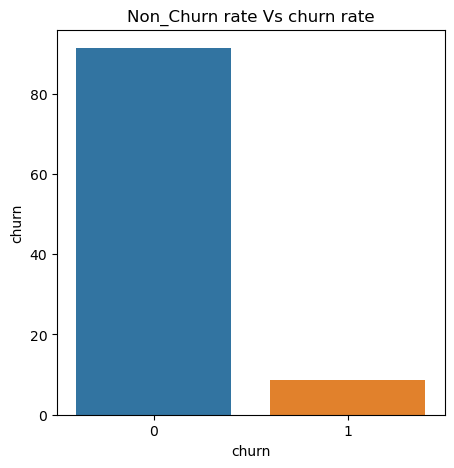

In [255]:
churn_percentage=(master_frame_HVC['churn'].value_counts()*100.0 /len(master_frame_HVC)),2
print(churn_percentage)

#churn_rate_graph = (master_frame_HVC['churn'].value_counts()*100.0 /len(master_frame_HVC)).plot(kind='bar',stacked = True,rot = 0,figsize = (8,6))                                                                                                                                                 
#churn_rate_graph.set_ylabel('% Customers',size = 14)
#churn_rate_graph.set_xlabel('Non_Churn Vs churn',size = 14)
#churn_rate_graph.set_title('churn Rate', size = 14)

sns.barplot(x="churn", y="churn", data=master_frame_HVC, estimator=lambda x: len(x) / len(master_frame_HVC) * 100)
plt.title("Non_Churn rate Vs churn rate")

           churn  high_value_customer
aon_years                            
0            672                 4853
1            818                 7616
2            504                 4661
3            197                 3044
4            110                 1980
5             51                 1251
6             78                 2069
7             73                 1826
8             53                 1523
9             19                  572
10            14                  556
11             0                   28


Text(0.5, 1.0, 'Churn count based on age on network')

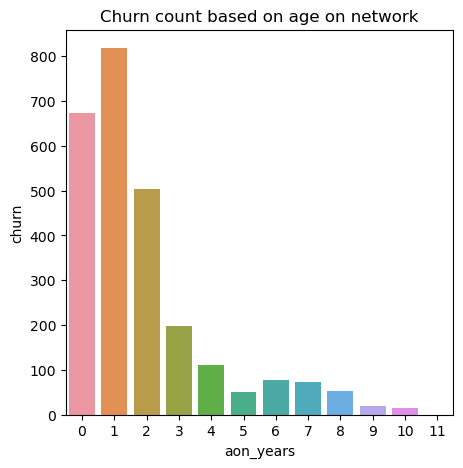

In [256]:
#Churn comparisions on other columns
#sns.boxplot(x=df.churn, y="aon_years", data=df)
#plt.title("Churn stats based on age on network")
aon_churn_hvc_counts=master_frame_HVC.pivot_table(index=['aon_years'],values=['high_value_customer','churn'], aggfunc='sum')
print(aon_churn_hvc_counts)

#plt.subplot(1,1, 1)
usa=sns.barplot(x=aon_churn_hvc_counts.index, y="churn", data=aon_churn_hvc_counts)
plt.title("Churn count based on age on network")


Text(0.5, 1.0, 'Churn stats based on arpu in August')

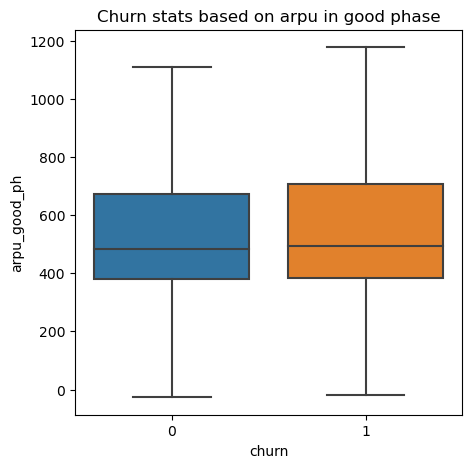

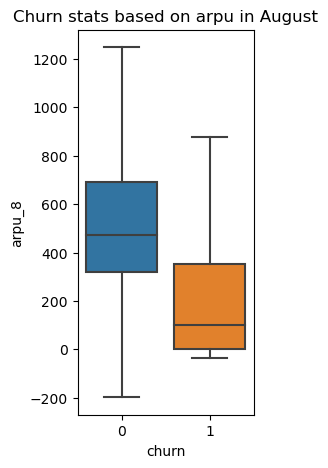

In [257]:
#Churn stats based on monthly ARPU
plt.figure(1)
plt.subplot(1,1, 1)
sns.boxplot(x=master_frame_HVC.churn, y="arpu_good_ph", data=master_frame_HVC, showfliers=False)
plt.title("Churn stats based on arpu in good phase")

plt.figure(2)
plt.subplot(1, 2, 2)
sns.boxplot(x=master_frame_HVC.churn, y="arpu_8", data=master_frame_HVC, showfliers=False)
plt.title("Churn stats based on arpu in August")



Text(0.5, 1.0, 'Churn stats based on total recharge in August')

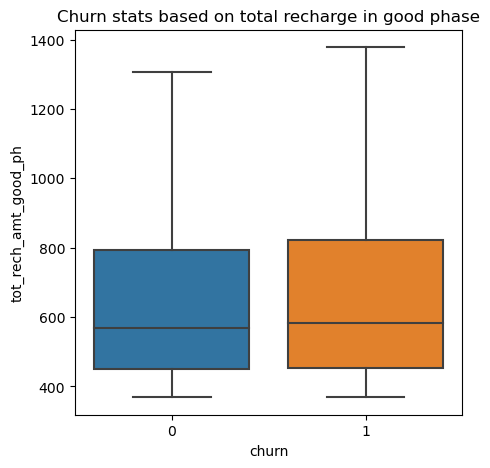

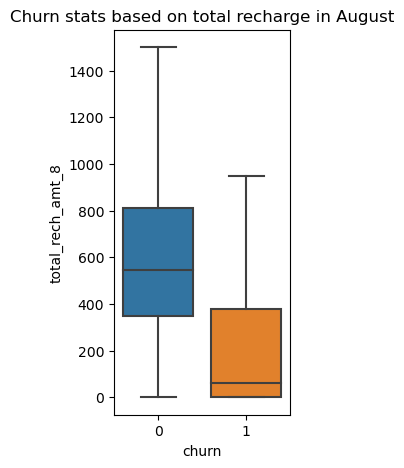

In [258]:
#Churn stats based on monthly Total recharge
plt.figure(1)
plt.subplot(1,1, 1)
sns.boxplot(x=master_frame_HVC.churn, y="tot_rech_amt_good_ph", data=master_frame_HVC, showfliers=False)
plt.title("Churn stats based on total recharge in good phase")

plt.figure(2)
plt.subplot(1, 2, 2)
sns.boxplot(x=master_frame_HVC.churn, y="total_rech_amt_8", data=master_frame_HVC, showfliers=False)
plt.title("Churn stats based on total recharge in August")


Text(0.5, 1.0, 'Churn stats based on day of last recharge in August')

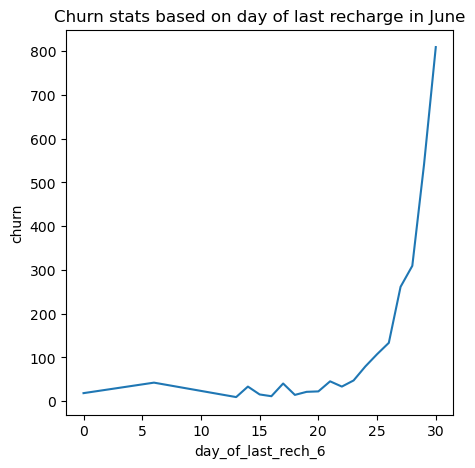

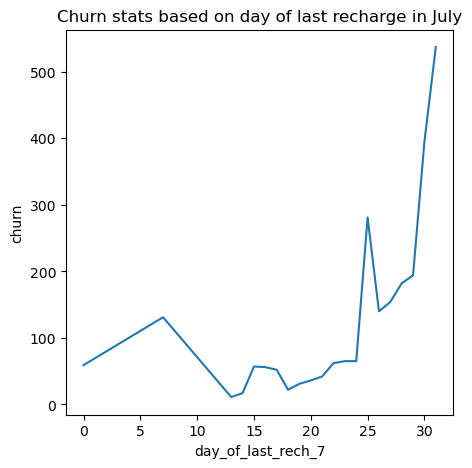

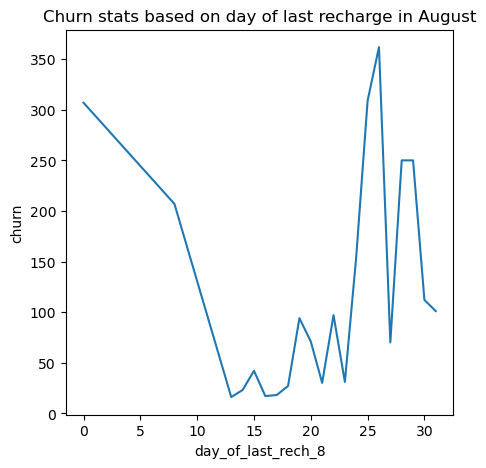

In [259]:
#Churn stats based on day of last recharge

last_day_rech_hvc_count_6=master_frame_HVC.pivot_table(index=['day_of_last_rech_6'],values=['high_value_customer','churn'], aggfunc='sum')
last_day_rech_hvc_count_7=master_frame_HVC.pivot_table(index=['day_of_last_rech_7'],values=['high_value_customer','churn'], aggfunc='sum')
last_day_rech_hvc_count_8=master_frame_HVC.pivot_table(index=['day_of_last_rech_8'],values=['high_value_customer','churn'], aggfunc='sum')

plt.figure(1)
plt.rcParams['figure.figsize']=(5,5)
plt.subplot(1,1, 1)
sns.lineplot(x=last_day_rech_hvc_count_6.index, y="churn", data=last_day_rech_hvc_count_6, )
plt.title("Churn stats based on day of last recharge in June")

plt.figure(2)
plt.rcParams['figure.figsize']=(5,5)
plt.subplot(1,1, 1)
sns.lineplot(x=last_day_rech_hvc_count_7.index, y="churn", data=last_day_rech_hvc_count_7)
plt.title("Churn stats based on day of last recharge in July")

plt.figure(3)
plt.rcParams['figure.figsize']=(5,5)
#plt.subplot(1,1, 1)
sns.lineplot(x=last_day_rech_hvc_count_8.index, y="churn", data=last_day_rech_hvc_count_8)
plt.title("Churn stats based on day of last recharge in August")

### Conclusions of univariate analysis
1. Churn rate is the highest for customers who are less thean 3 years with the operator.
2. The max revenue for churn customer is below the average revenue for non churn customer.
3. The max total recharge for churn customer is below the total recharge for non churn customer.
4. Since a typical recharge is valid for 1 month, we see the initial graph on a steady trend of recharge towards the end of the month. But, the trend changes for the next two month we observe intermediary recharges and increase in churn activity. Suggestion is to incorporate better benefits in the monthly recharges for stable customer satisfaction

## Step 6: Bivariate Analysis

In [260]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

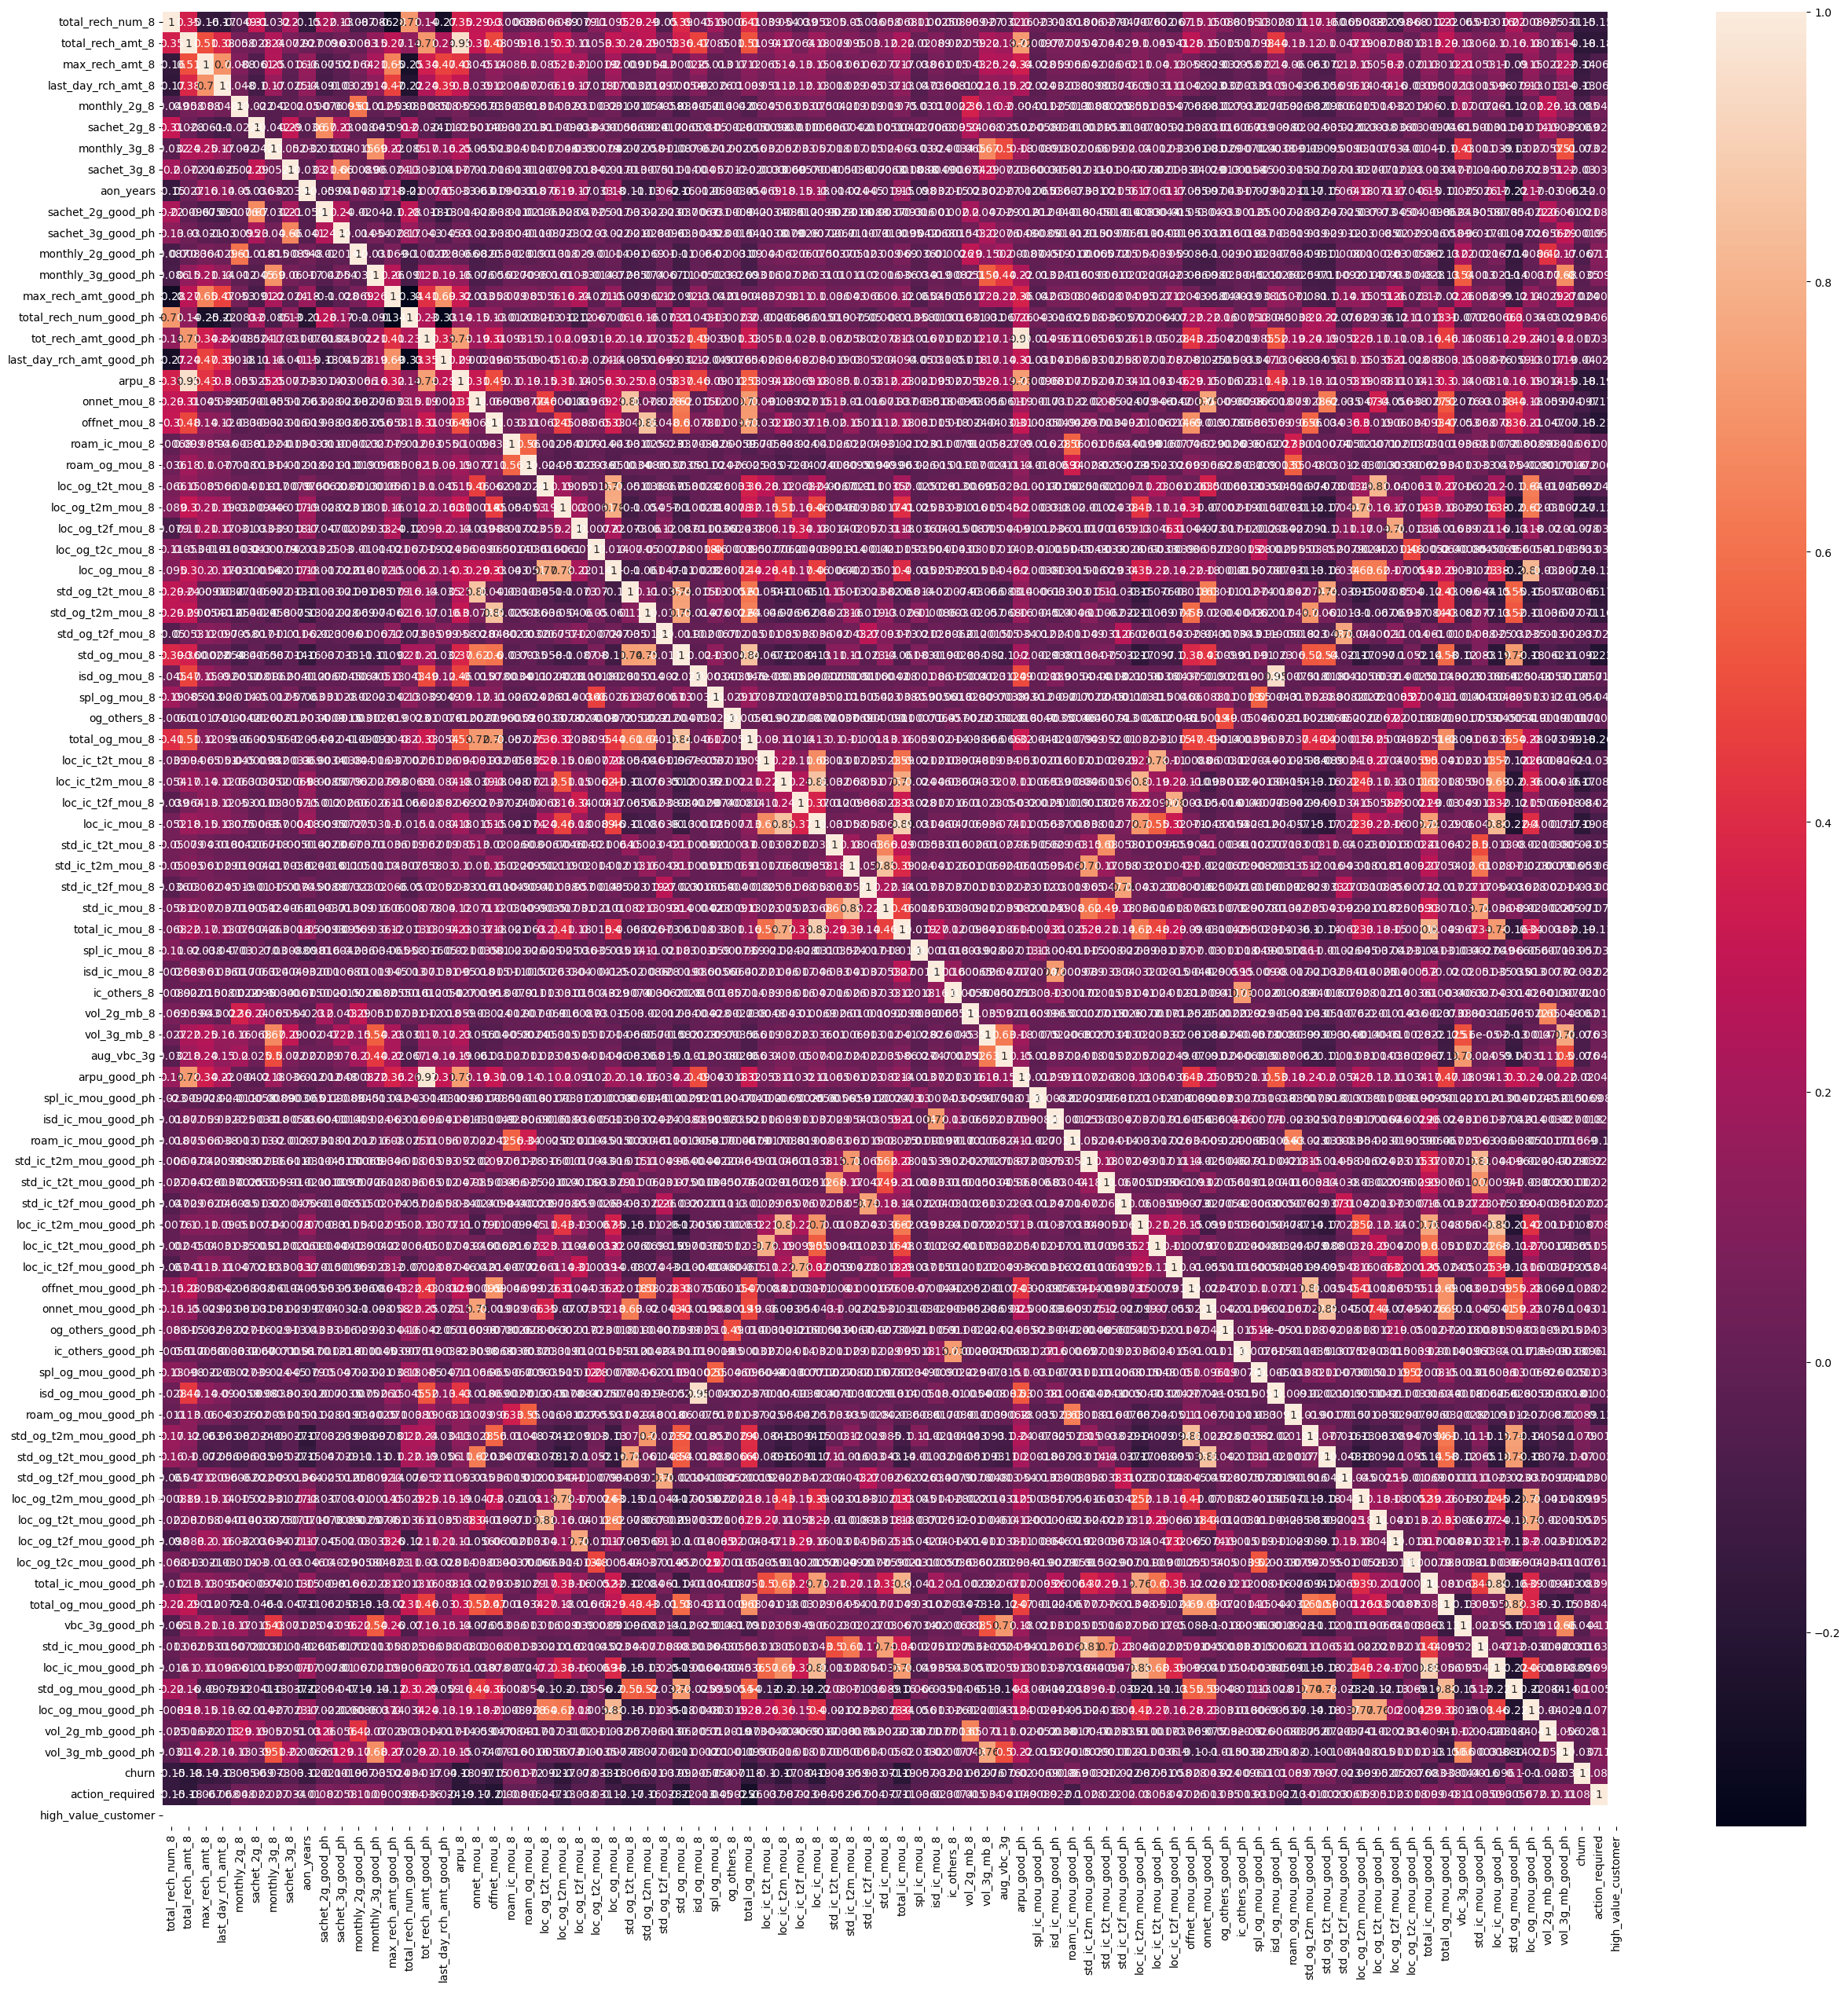

In [261]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(master_frame_HVC.corr(),annot = True)
plt.show()

### Conclusions of Bivariate analysis
### We see very few columns with high correlation in between. Further analysis is continued using PCA.

In [262]:
# To handle class imbalance.
logregcv = LogisticRegressionCV(class_weight='balanced',cv=20)

### Step 7: Test-Train Split

In [263]:
from sklearn.model_selection import train_test_split

X=master_frame_HVC.drop(['churn'],axis=1)

y=master_frame_HVC['churn']

y.head()

mobile_number
7000701601    1
7001524846    0
7002191713    0
7000875565    0
7000187447    0
Name: churn, dtype: int64

In [264]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.7, random_state=42,stratify=y)

In [265]:
X_train.head()

total_rech_num_8  total_rech_amt_8  max_rech_amt_8  \
mobile_number                                                       
7000669104                    6               546             130   
7000402026                    8               824             154   
7001391178                   21               764             130   
7002018307                    6               650             130   
7001748476                   11               605             169   

               last_day_rch_amt_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
mobile_number                                                                
7000669104                      0             0            0             0   
7000402026                    150             1            0             0   
7001391178                     23             0            0             0   
7002018307                    130             0            0             0   
7001748476                      0             0            0             0   

               sachet_3g_8  aon_years  sachet_2g_good_ph  ...  \
mobile_number                                             ...   
7000669104               0          4                0.0  ...   
7000402026               0          2                0.0  ...   
7001391178               0          3                0.0  ...   
7002018307               0          6                0.0  ...   
7001748476               0          1                0.0  ...   

               total_og_mou_good_ph  vbc_3g_good_ph  std_ic_mou_good_ph  \
mobile_number                                                             
7000669104                 1848.215           0.000              45.270   
7000402026                  301.160           0.000              67.860   
7001391178                   90.930          76.075              16.630   
7002018307                  434.210           0.000              23.410   
7001748476                  727.720           0.000               1.455   

               loc_ic_mou_good_ph  std_og_mou_good_ph  loc_og_mou_good_ph  \
mobile_number                                                               
7000669104                 77.005            1721.110              106.90   
7000402026                 47.880             236.930               55.67   
7001391178                135.855               4.155               80.23   
7002018307                130.000             106.900              322.47   
7001748476                 26.880             694.745               32.51   

               vol_2g_mb_good_ph vol_3g_mb_good_ph action_required  \
mobile_number                                                        
7000669104                 0.865            512.33               1   
7000402026               330.245              0.71               1   
7001391178                 0.000              0.00               0   
7002018307                 0.000              0.00               1   
7001748476                 0.000              0.00               0   

              high_value_customer  
mobile_number                      
7000669104                   True  
7000402026                   True  
7001391178                   True  
7002018307                   True  
7001748476                   True  

[5 rows x 88 columns]

In [266]:
X_train.shape

(20985, 88)

In [267]:
X_test.shape

(8994, 88)

### Step 8: Feature scaling in train and test Data

In [268]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [269]:
X_train = pd.DataFrame(X_train, columns=X.columns.tolist())
X_test = pd.DataFrame(X_test, columns=X.columns.tolist())

In [270]:
X_train.head()

total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0         -0.446222         -0.120083       -0.187419           -0.645018   
1         -0.234334          0.410158       -0.050759            0.368976   
2          1.142938          0.295717       -0.187419           -0.489539   
3         -0.446222          0.078281       -0.187419            0.233777   
4          0.083498         -0.007550        0.034653           -0.645018   

   monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  aon_years  \
0     -0.318315    -0.327589      -0.29811    -0.142157   0.382464   
1      2.470764    -0.327589      -0.29811    -0.142157  -0.354272   
2     -0.318315    -0.327589      -0.29811    -0.142157   0.014096   
3     -0.318315    -0.327589      -0.29811    -0.142157   1.119200   
4     -0.318315    -0.327589      -0.29811    -0.142157  -0.722640   

   sachet_2g_good_ph  ...  total_og_mou_good_ph  vbc_3g_good_ph  \
0          -0.322029  ...              1.898281       -0.349485   
1          -0.322029  ...             -0.650806       -0.349485   
2          -0.322029  ...             -0.997202       -0.145330   
3          -0.322029  ...             -0.431579       -0.349485   
4          -0.322029  ...              0.052038       -0.349485   

   std_ic_mou_good_ph  loc_ic_mou_good_ph  std_og_mou_good_ph  \
0           -0.050728           -0.563974            2.299885   
1            0.119928           -0.661131           -0.294499   
2           -0.267088           -0.367658           -0.701396   
3           -0.215869           -0.387189           -0.521795   
4           -0.381728           -0.731184            0.505773   

   loc_og_mou_good_ph  vol_2g_mb_good_ph  vol_3g_mb_good_ph  action_required  \
0           -0.490779          -0.302375           0.328327         0.784442   
1           -0.634671           0.963922          -0.352741         0.784442   
2           -0.565689          -0.305701          -0.353686        -1.274792   
3            0.114703          -0.305701          -0.353686         0.784442   
4           -0.699722          -0.305701          -0.353686        -1.274792   

   high_value_customer  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 88 columns]

In [271]:
X_test.head()

total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0         -0.444856         -0.530691       -0.392343           -0.692552   
1         -1.071519         -0.830938       -0.984200           -0.692552   
2          1.539577          0.336837       -0.579563           -0.253797   
3         -0.549300         -0.033822       -0.078297            0.386354   
4         -0.653744          0.165457        0.525639            1.105625   

   monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  aon_years  \
0     -0.321494     1.283644     -0.295119    -0.148593  -0.714719   
1     -0.321494    -0.333467     -0.295119    -0.148593   1.122429   
2     -0.321494    -0.333467     -0.295119    -0.148593  -0.714719   
3      2.499496    -0.333467     -0.295119    -0.148593  -0.714719   
4     -0.321494    -0.333467     -0.295119    -0.148593   1.857289   

   sachet_2g_good_ph  ...  total_og_mou_good_ph  vbc_3g_good_ph  \
0          -0.027169  ...              0.032974       -0.353104   
1          -0.335316  ...             -0.506944       -0.353104   
2          -0.335316  ...              0.759307       -0.353104   
3          -0.335316  ...             -0.490456        1.683022   
4          -0.335316  ...              0.252899       -0.353104   

   std_ic_mou_good_ph  loc_ic_mou_good_ph  std_og_mou_good_ph  \
0            0.198055           -0.551233            0.022477   
1           -0.357072            0.162981           -0.589694   
2           -0.140783            0.287297            0.987603   
3           -0.322943            2.799367           -0.694598   
4            0.838203            0.951118           -0.514479   

   loc_og_mou_good_ph  vol_2g_mb_good_ph  vol_3g_mb_good_ph  action_required  \
0            0.047114           0.582397          -0.309060         0.777585   
1            0.108572          -0.317606          -0.309060        -1.286033   
2           -0.292667          -0.317606          -0.309060        -1.286033   
3            0.305518          -0.002491           0.623742         0.777585   
4            1.271098          -0.317606          -0.309060         0.777585   

   high_value_customer  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 88 columns]

In [272]:
### Logistic Regression using RFE

###  Step 9: Model Building using PCA
### Model Building : Model 1

Check if PCA n components with different number improve the model 
- 90%

In [273]:
pca = PCA(0.90)

In [274]:
X_train_pca=pca.fit_transform(X_train)

In [275]:
X_train_pca.shape

(20985, 40)

In [276]:
pca.components_

array([[ 0.07631376,  0.22565805,  0.13664475, ...,  0.03945429,
        -0.03219765,  0.        ],
       [ 0.1550809 ,  0.09451591, -0.0611406 , ..., -0.08169816,
        -0.04895313, -0.        ],
       [-0.05263831,  0.17232843,  0.21577286, ...,  0.2758068 ,
         0.00326151, -0.        ],
       ...,
       [ 0.21067701, -0.07294516,  0.00720481, ...,  0.09409805,
        -0.15224586,  0.        ],
       [-0.08181935,  0.04668417, -0.02757861, ...,  0.10430021,
         0.01500953,  0.        ],
       [-0.0414364 , -0.02785003, -0.04567267, ...,  0.06629779,
        -0.33250609,  0.        ]])

In [277]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(30)

PC1       PC2                   Feature
0   0.076314  0.155081          total_rech_num_8
1   0.225658  0.094516          total_rech_amt_8
2   0.136645 -0.061141            max_rech_amt_8
3   0.109456 -0.053773        last_day_rch_amt_8
4   0.014800 -0.062340              monthly_2g_8
5  -0.002776  0.011059               sachet_2g_8
6   0.056405 -0.070422              monthly_3g_8
7   0.006633  0.001005               sachet_3g_8
8   0.049402 -0.105474                 aon_years
9  -0.013269  0.003020         sachet_2g_good_ph
10  0.000049 -0.005437         sachet_3g_good_ph
11  0.005281 -0.074160        monthly_2g_good_ph
12  0.042444 -0.077801        monthly_3g_good_ph
13  0.107157 -0.091836      max_rech_amt_good_ph
14  0.042197  0.141968    total_rech_num_good_ph
15  0.203236  0.088799      tot_rech_amt_good_ph
16  0.092742 -0.065166  last_day_rch_amt_good_ph
17  0.018894  0.082426        day_of_last_rech_6
18  0.045239  0.082422        day_of_last_rech_7
19  0.056560  0.090280        day_of_last_rech_8
20  0.227551  0.094939                    arpu_8
21  0.114200  0.193677               onnet_mou_8
22  0.176201  0.145504              offnet_mou_8
23  0.014692  0.009129             roam_ic_mou_8
24  0.020827  0.034125             roam_og_mou_8
25  0.140697 -0.015775          loc_og_t2t_mou_8
26  0.200952 -0.078505          loc_og_t2m_mou_8
27  0.086549 -0.082558          loc_og_t2f_mou_8
28  0.018990  0.041402          loc_og_t2c_mou_8
29  0.223706 -0.064848              loc_og_mou_8

In [278]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [279]:
corrmat.shape

(40, 40)

In [280]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.1020247642732028e-15 , min corr:  -1.5109065046754805e-15


In [281]:
#Applying selected components to the test data - 16 components
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(8994, 40)

In [282]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(X_train_pca,y_train)

In [283]:
#Making prediction on the train data
y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.89'

In [284]:
#Making prediction on the test data
y_pred = model_pca.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.89'

In [285]:
y_pred=pd.Series(y_pred)
y_train_pred=pd.Series(y_train_pred)

In [286]:
y_pred_bool= y_pred.apply(lambda x: 1 if x>=0.5 else 0)
y_train_pred_bool= y_train_pred.apply(lambda x: 1 if x>=0.5 else 0)

In [287]:
confusion_matrix(y_train,y_train_pred_bool)

array([[15931,  3242],
       [  315,  1497]], dtype=int64)

In [288]:
confusion_matrix(y_test,y_pred_bool)

array([[6855, 1362],
       [ 139,  638]], dtype=int64)

In [289]:
precision_score(y_test,y_pred_bool)

0.319

In [290]:
recall_score(y_test,y_pred_bool)

0.8211068211068211

In [291]:
accuracy_score(y_test,y_pred_bool)

0.8331109628641317

In [292]:
#Function to calculate Model Metrics

def get_model_metrics(actual,predicted):
    """
    Print Summary Metrics of the Model

    Parameters:
    actual (pandas.core.series.Series): Series of Boolean values for target column
    predicted (pandas.core.series.Series): Series of Boolean values for Model predicted the target column
    
    Returns:
    None

   """

    
    confusion = metrics.confusion_matrix(actual,predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    accuracy=metrics.accuracy_score(actual,predicted)
    sensitivity = TP / float(TP+FN)
    specificity = TN / float(TN+FP)
    precision=TP/float(FP+TP)
    recall=TP/float(FN+TP)
    
    precision=metrics.precision_score(actual,predicted)
    recall=metrics.recall_score(actual,predicted)
    f1=metrics.f1_score(actual,predicted, average='weighted') 
    print("Accuracy    : "+str(round(accuracy,2)))
    print("Sensitivity : "+str(round(sensitivity,2)))
    print("Specificity : "+str(round(specificity,2)))
    print("Precision   : "+str(round(precision,2)))
    print("Recall      : "+str(round(recall,2)))
    print("F1_score    : "+str(round(f1,2)))

def get_cross_validated_model_metrics(X,y,cv=5):
    """
    Get cross validated model metric for k folds

    Parameters:
    X (pandas.core.frame.DataFrame): DF of all the features excluding target column
    y (pandas.core.series.Series): Series of Boolean values of the target column
    
    Returns:
    df (pandas.core.frame.DataFrame): DF will all the metric for k fold

   """
    accuracy=cross_val_score(logregcv, X, y, cv=cv,n_jobs=-1,scoring='accuracy')
    precision=cross_val_score(logregcv, X, y, cv=cv,n_jobs=-1,scoring='precision')
    recall=cross_val_score(logregcv, X, y, cv=cv,n_jobs=-1,scoring='recall')
    f1_weighted=cross_val_score(logregcv, X, y, cv=cv,n_jobs=-1,scoring='f1_weighted')
    roc_auc=cross_val_score(logregcv, X, y, cv=cv,n_jobs=-1,scoring='roc_auc')
    df=pd.DataFrame(
    {'accuracy': accuracy,
     'precision': precision,
     'recall': recall,
     'f1_weighted': f1_weighted,
     'roc_auc': roc_auc,
    })
    return df

#### Model 1 metric Summary

In [293]:
get_model_metrics(y_test,y_pred_bool)

Accuracy    : 0.83
Sensitivity : 0.82
Specificity : 0.83
Precision   : 0.32
Recall      : 0.82
F1_score    : 0.86


####  Model 2 

Check if PCA n components with different number improve the model 
- 85%

In [294]:
pca = PCA(0.85)

In [295]:
X_train_pca=pca.fit_transform(X_train)

In [296]:
X_train_pca.shape

(20985, 33)

In [297]:
pca.components_

array([[ 0.07631376,  0.22565805,  0.13664475, ...,  0.03945429,
        -0.03219765,  0.        ],
       [ 0.1550809 ,  0.09451591, -0.0611406 , ..., -0.08169816,
        -0.04895313, -0.        ],
       [-0.05263831,  0.17232843,  0.21577286, ...,  0.2758068 ,
         0.00326151, -0.        ],
       ...,
       [ 0.08521014,  0.08173666, -0.05936777, ..., -0.01811973,
         0.24414636,  0.        ],
       [-0.03449784, -0.14554425, -0.10180413, ...,  0.11335948,
         0.10258466, -0.        ],
       [-0.33847497, -0.04159759,  0.03133099, ..., -0.00532102,
        -0.01062493,  0.        ]])

In [298]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2             Feature
0  0.076314  0.155081    total_rech_num_8
1  0.225658  0.094516    total_rech_amt_8
2  0.136645 -0.061141      max_rech_amt_8
3  0.109456 -0.053773  last_day_rch_amt_8
4  0.014800 -0.062340        monthly_2g_8

In [299]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [300]:
corrmat.shape

(33, 33)

In [301]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.1020247642732028e-15 , min corr:  -1.5109065046754805e-15


In [302]:
#Applying selected components to the test data - 16 components
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(8994, 33)

In [303]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(X_train_pca,y_train)

In [304]:
#Making prediction on the train data
y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.89'

In [305]:
#Making prediction on the test data
y_pred = model_pca.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.89'

In [306]:
y_pred=pd.Series(y_pred)
y_train_pred=pd.Series(y_train_pred)

In [307]:
y_pred_bool= y_pred.apply(lambda x: 1 if x>=0.5 else 0)
y_train_pred_bool= y_train_pred.apply(lambda x: 1 if x>=0.5 else 0)

In [308]:
confusion_matrix(y_test,y_pred_bool)

array([[6811, 1406],
       [ 141,  636]], dtype=int64)

In [309]:
confusion_matrix(y_train,y_train_pred_bool)

array([[15832,  3341],
       [  325,  1487]], dtype=int64)

In [310]:
import  sklearn.metrics

In [311]:
precision_score(y_test,y_pred_bool)

0.31145935357492655

In [312]:
recall_score(y_test,y_pred_bool)

0.8185328185328186

In [313]:
accuracy_score(y_test,y_pred_bool)

0.8279964420724928

#### Model 2 Metric Summary

In [314]:
get_model_metrics(y_test,y_pred_bool)

Accuracy    : 0.83
Sensitivity : 0.82
Specificity : 0.83
Precision   : 0.31
Recall      : 0.82
F1_score    : 0.86


####  Model 3

Check if PCA n components with different number improve the model 
- 80% 

In [315]:
pca = PCA(0.80)

In [316]:
X_train_pca=pca.fit_transform(X_train)

In [317]:
X_train_pca.shape

(20985, 28)

In [318]:
pca.components_

array([[ 0.07631376,  0.22565805,  0.13664475, ...,  0.03945429,
        -0.03219765,  0.        ],
       [ 0.1550809 ,  0.09451591, -0.0611406 , ..., -0.08169816,
        -0.04895313, -0.        ],
       [-0.05263831,  0.17232843,  0.21577286, ...,  0.2758068 ,
         0.00326151, -0.        ],
       ...,
       [-0.05009221,  0.04891432, -0.04658284, ..., -0.04618541,
        -0.04721262, -0.        ],
       [-0.08923421, -0.01503037, -0.01435317, ..., -0.00041659,
         0.19948495, -0.        ],
       [-0.14068104, -0.04262955, -0.12522365, ...,  0.02022594,
         0.0556728 ,  0.        ]])

In [319]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2             Feature
0  0.076314  0.155081    total_rech_num_8
1  0.225658  0.094516    total_rech_amt_8
2  0.136645 -0.061141      max_rech_amt_8
3  0.109456 -0.053773  last_day_rch_amt_8
4  0.014800 -0.062340        monthly_2g_8

In [320]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [321]:
corrmat.shape

(28, 28)

In [322]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.1020247642732028e-15 , min corr:  -1.5109065046754805e-15


In [323]:
#Applying selected components to the test data - 16 components
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(8994, 28)

In [324]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(X_train_pca,y_train)

In [325]:
#Making prediction on the train data
y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.88'

In [326]:
#Making prediction on the test data
y_pred = model_pca.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.88'

In [327]:
y_pred=pd.Series(y_pred)
y_train_pred=pd.Series(y_train_pred)

In [328]:
y_pred_bool= y_pred.apply(lambda x: 1 if x>=0.5 else 0)
y_train_pred_bool= y_train_pred.apply(lambda x: 1 if x>=0.5 else 0)

In [329]:
confusion_matrix(y_test,y_pred_bool)

array([[6843, 1374],
       [ 144,  633]], dtype=int64)

In [330]:
confusion_matrix(y_train,y_train_pred_bool)

array([[15873,  3300],
       [  347,  1465]], dtype=int64)

In [331]:
import  sklearn.metrics

In [332]:
precision_score(y_test,y_pred_bool)

0.3153961136023916

In [333]:
recall_score(y_test,y_pred_bool)

0.8146718146718147

In [334]:
accuracy_score(y_test,y_pred_bool)

0.8312208138759173

#### Model 3 Metric Summary

In [335]:
get_model_metrics(y_test,y_pred_bool)

Accuracy    : 0.83
Sensitivity : 0.81
Specificity : 0.83
Precision   : 0.32
Recall      : 0.81
F1_score    : 0.86


#### N components with 80% 85% and 90% doesnt have much impact. We will go with PCA components as 90%

In [336]:
?PCA

In [337]:
X_train.shape

(20985, 88)

In [338]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [339]:
X_train_pca=pca.fit_transform(X_train)

In [340]:
X_train_pca.shape

(20985, 88)

In [341]:
pca.components_

array([[ 7.63137572e-02,  2.25658047e-01,  1.36644747e-01, ...,
         3.94542942e-02, -3.21976533e-02,  0.00000000e+00],
       [ 1.55080905e-01,  9.45159095e-02, -6.11406027e-02, ...,
        -8.16981589e-02, -4.89531288e-02,  0.00000000e+00],
       [-5.26383122e-02,  1.72328427e-01,  2.15772855e-01, ...,
         2.75806802e-01,  3.26151074e-03, -0.00000000e+00],
       ...,
       [-5.52190188e-08,  1.69317255e-07, -1.19320662e-07, ...,
         1.07970900e-08,  1.16824527e-07,  0.00000000e+00],
       [-7.55946731e-08,  1.19497604e-07, -3.82052220e-08, ...,
        -4.06269810e-08,  2.66169948e-10,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [342]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(30)

PC1       PC2                   Feature
0   0.076314  0.155081          total_rech_num_8
1   0.225658  0.094516          total_rech_amt_8
2   0.136645 -0.061141            max_rech_amt_8
3   0.109456 -0.053773        last_day_rch_amt_8
4   0.014800 -0.062340              monthly_2g_8
5  -0.002776  0.011059               sachet_2g_8
6   0.056405 -0.070422              monthly_3g_8
7   0.006633  0.001005               sachet_3g_8
8   0.049402 -0.105474                 aon_years
9  -0.013269  0.003020         sachet_2g_good_ph
10  0.000049 -0.005437         sachet_3g_good_ph
11  0.005281 -0.074160        monthly_2g_good_ph
12  0.042444 -0.077801        monthly_3g_good_ph
13  0.107157 -0.091836      max_rech_amt_good_ph
14  0.042197  0.141968    total_rech_num_good_ph
15  0.203236  0.088799      tot_rech_amt_good_ph
16  0.092742 -0.065166  last_day_rch_amt_good_ph
17  0.018894  0.082426        day_of_last_rech_6
18  0.045239  0.082422        day_of_last_rech_7
19  0.056560  0.090280        day_of_last_rech_8
20  0.227551  0.094939                    arpu_8
21  0.114200  0.193677               onnet_mou_8
22  0.176201  0.145504              offnet_mou_8
23  0.014692  0.009129             roam_ic_mou_8
24  0.020827  0.034125             roam_og_mou_8
25  0.140697 -0.015775          loc_og_t2t_mou_8
26  0.200952 -0.078505          loc_og_t2m_mou_8
27  0.086549 -0.082558          loc_og_t2f_mou_8
28  0.018990  0.041402          loc_og_t2c_mou_8
29  0.223706 -0.064848              loc_og_mou_8

In [343]:
pca.explained_variance_ratio_

array([1.05521991e-01, 9.35494301e-02, 6.06962047e-02, 4.87794102e-02,
       4.36724145e-02, 3.84388085e-02, 3.10242768e-02, 2.91854602e-02,
       2.81322575e-02, 2.74115453e-02, 2.63261357e-02, 2.52658612e-02,
       2.42818369e-02, 2.30050417e-02, 2.13231896e-02, 2.02746019e-02,
       1.88432997e-02, 1.67136682e-02, 1.47511641e-02, 1.43659497e-02,
       1.39368813e-02, 1.34987690e-02, 1.30998275e-02, 1.24573287e-02,
       1.20181765e-02, 1.07140994e-02, 1.00945181e-02, 9.86326536e-03,
       9.73170698e-03, 9.46057780e-03, 9.27651806e-03, 8.57902144e-03,
       8.53612969e-03, 8.08850273e-03, 8.00400008e-03, 7.71038169e-03,
       7.36560987e-03, 7.24306190e-03, 6.87255333e-03, 6.81615306e-03,
       6.64612975e-03, 6.18861541e-03, 5.77094498e-03, 5.35073459e-03,
       5.10445803e-03, 4.95816308e-03, 4.55809191e-03, 3.74560285e-03,
       3.65600633e-03, 3.49411943e-03, 3.39704183e-03, 3.28289379e-03,
       3.14395769e-03, 3.05154324e-03, 3.00837995e-03, 2.74733893e-03,
      

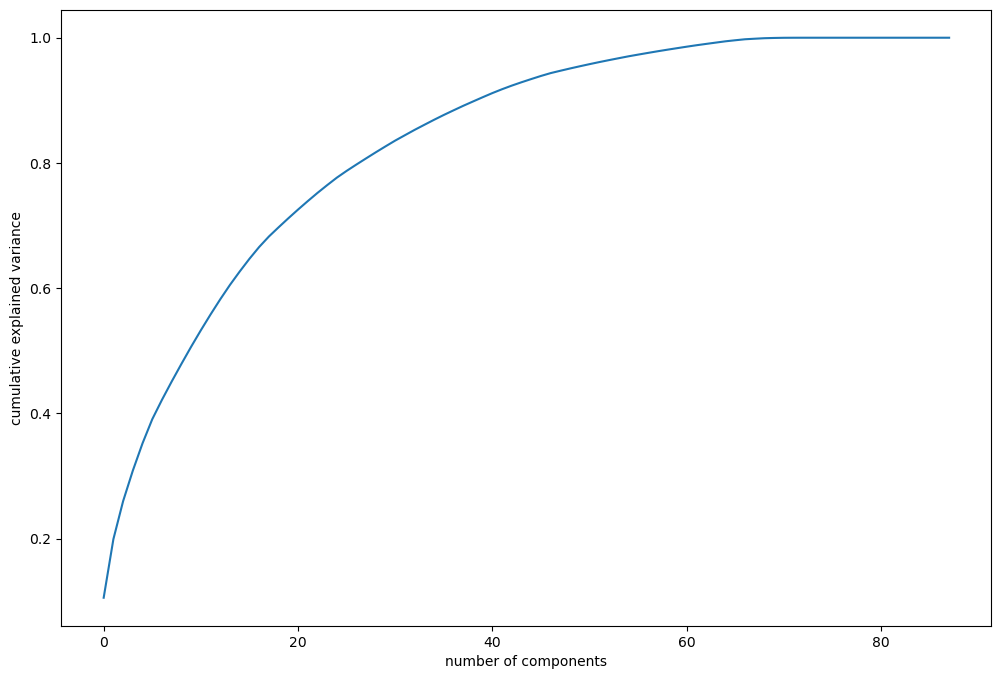

In [344]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### N components analysis: Based on skree graph  we will take 40 n components.
40 components represent 90% of the varaiance of the data

In [345]:
?IncrementalPCA

In [346]:
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components=40)

In [347]:
X_train_pca=pca.fit_transform(X_train)

In [348]:
X_train_pca.shape

(20985, 40)

In [349]:
pca.components_

array([[ 0.07627448,  0.22559962,  0.13665706, ...,  0.03949459,
        -0.03226708, -0.        ],
       [ 0.15511893,  0.09450821, -0.06112778, ..., -0.08174153,
        -0.04890725,  0.        ],
       [-0.05247858,  0.17216663,  0.2159833 , ...,  0.27595519,
         0.00327357, -0.        ],
       ...,
       [-0.01860839, -0.01088778,  0.04264094, ...,  0.03045319,
         0.10084161,  0.        ],
       [ 0.08361213, -0.05697865,  0.01254072, ..., -0.24117302,
        -0.15102008,  0.        ],
       [-0.07890464, -0.0137026 ,  0.07821123, ...,  0.28504519,
        -0.18730312,  0.        ]])

In [350]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(30)

PC1       PC2                   Feature
0   0.076274  0.155119          total_rech_num_8
1   0.225600  0.094508          total_rech_amt_8
2   0.136657 -0.061128            max_rech_amt_8
3   0.109531 -0.053755        last_day_rch_amt_8
4   0.014759 -0.062265              monthly_2g_8
5  -0.002805  0.011082               sachet_2g_8
6   0.056477 -0.070421              monthly_3g_8
7   0.006598  0.001008               sachet_3g_8
8   0.049411 -0.105485                 aon_years
9  -0.013202  0.002992         sachet_2g_good_ph
10  0.000098 -0.005436         sachet_3g_good_ph
11  0.005374 -0.074227        monthly_2g_good_ph
12  0.042526 -0.077730        monthly_3g_good_ph
13  0.107157 -0.091796      max_rech_amt_good_ph
14  0.042215  0.141993    total_rech_num_good_ph
15  0.203200  0.088838      tot_rech_amt_good_ph
16  0.092693 -0.065245  last_day_rch_amt_good_ph
17  0.018886  0.082426        day_of_last_rech_6
18  0.045224  0.082442        day_of_last_rech_7
19  0.056647  0.090224        day_of_last_rech_8
20  0.227465  0.094934                    arpu_8
21  0.114215  0.193630               onnet_mou_8
22  0.176173  0.145532              offnet_mou_8
23  0.014779  0.009178             roam_ic_mou_8
24  0.020700  0.034038             roam_og_mou_8
25  0.140623 -0.015782          loc_og_t2t_mou_8
26  0.200947 -0.078481          loc_og_t2m_mou_8
27  0.086540 -0.082531          loc_og_t2f_mou_8
28  0.019085  0.041484          loc_og_t2c_mou_8
29  0.223655 -0.064836              loc_og_mou_8

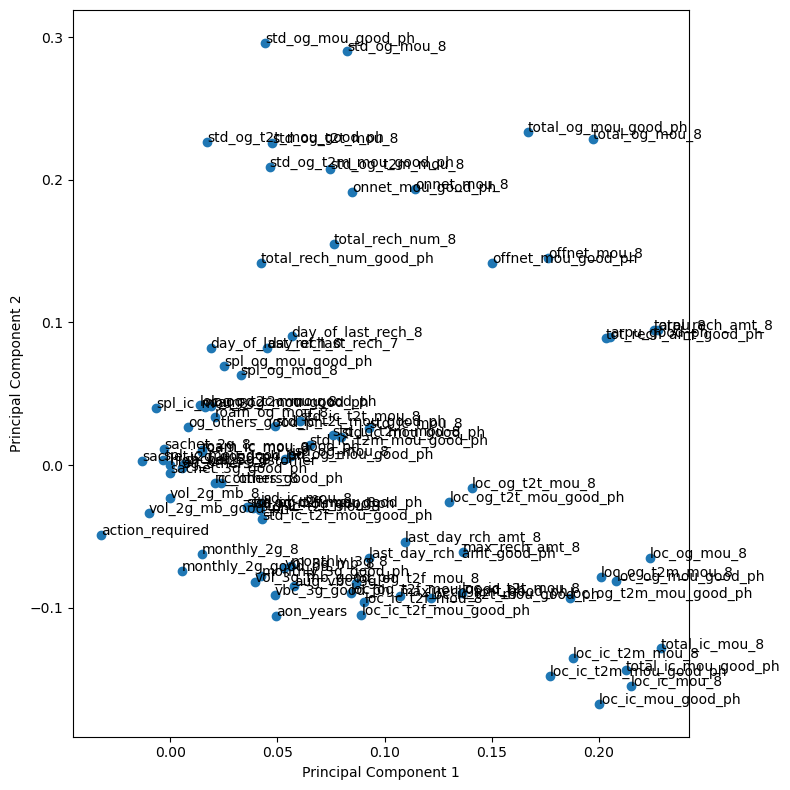

In [351]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [352]:
pca.explained_variance_ratio_

array([0.10552004, 0.09354814, 0.06069155, 0.04876087, 0.04366748,
       0.03843358, 0.03098087, 0.02915563, 0.02809525, 0.0273675 ,
       0.0262706 , 0.02525191, 0.02424839, 0.02290307, 0.0212553 ,
       0.02026436, 0.01882991, 0.01656307, 0.01469364, 0.01428433,
       0.01381344, 0.01341779, 0.01264644, 0.01225783, 0.01191639,
       0.01067991, 0.01002602, 0.00980076, 0.00939982, 0.00923456,
       0.0085397 , 0.00828009, 0.0080412 , 0.00748241, 0.00733773,
       0.00710357, 0.0067599 , 0.00646771, 0.00623011, 0.00575485])

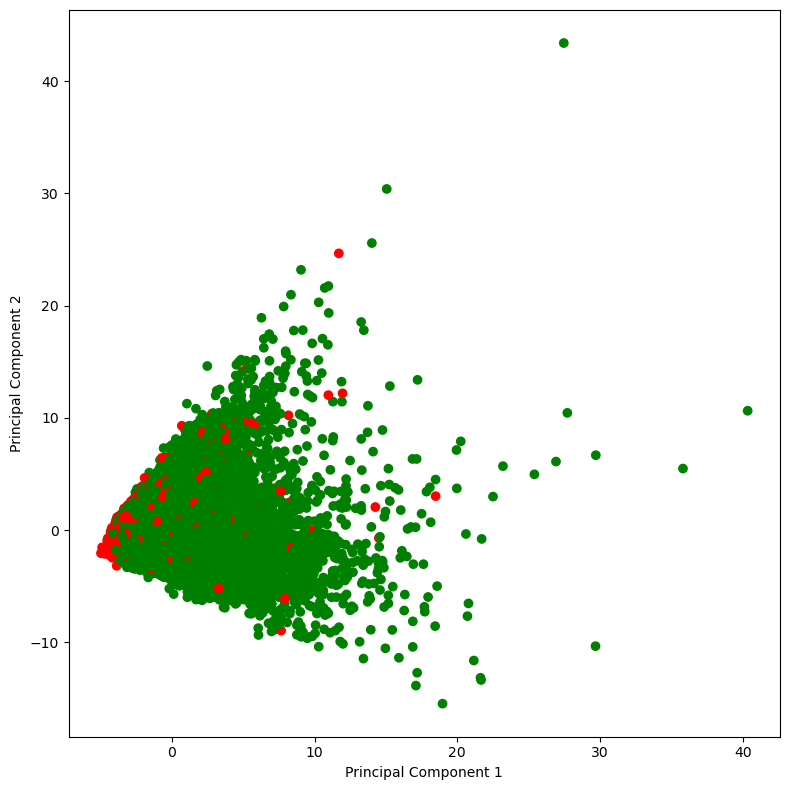

In [353]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [354]:
X_train.head()

total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0         -0.446222         -0.120083       -0.187419           -0.645018   
1         -0.234334          0.410158       -0.050759            0.368976   
2          1.142938          0.295717       -0.187419           -0.489539   
3         -0.446222          0.078281       -0.187419            0.233777   
4          0.083498         -0.007550        0.034653           -0.645018   

   monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  aon_years  \
0     -0.318315    -0.327589      -0.29811    -0.142157   0.382464   
1      2.470764    -0.327589      -0.29811    -0.142157  -0.354272   
2     -0.318315    -0.327589      -0.29811    -0.142157   0.014096   
3     -0.318315    -0.327589      -0.29811    -0.142157   1.119200   
4     -0.318315    -0.327589      -0.29811    -0.142157  -0.722640   

   sachet_2g_good_ph  ...  total_og_mou_good_ph  vbc_3g_good_ph  \
0          -0.322029  ...              1.898281       -0.349485   
1          -0.322029  ...             -0.650806       -0.349485   
2          -0.322029  ...             -0.997202       -0.145330   
3          -0.322029  ...             -0.431579       -0.349485   
4          -0.322029  ...              0.052038       -0.349485   

   std_ic_mou_good_ph  loc_ic_mou_good_ph  std_og_mou_good_ph  \
0           -0.050728           -0.563974            2.299885   
1            0.119928           -0.661131           -0.294499   
2           -0.267088           -0.367658           -0.701396   
3           -0.215869           -0.387189           -0.521795   
4           -0.381728           -0.731184            0.505773   

   loc_og_mou_good_ph  vol_2g_mb_good_ph  vol_3g_mb_good_ph  action_required  \
0           -0.490779          -0.302375           0.328327         0.784442   
1           -0.634671           0.963922          -0.352741         0.784442   
2           -0.565689          -0.305701          -0.353686        -1.274792   
3            0.114703          -0.305701          -0.353686         0.784442   
4           -0.699722          -0.305701          -0.353686        -1.274792   

   high_value_customer  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 88 columns]

In [355]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [356]:
corrmat.shape

(40, 40)

<Axes: >

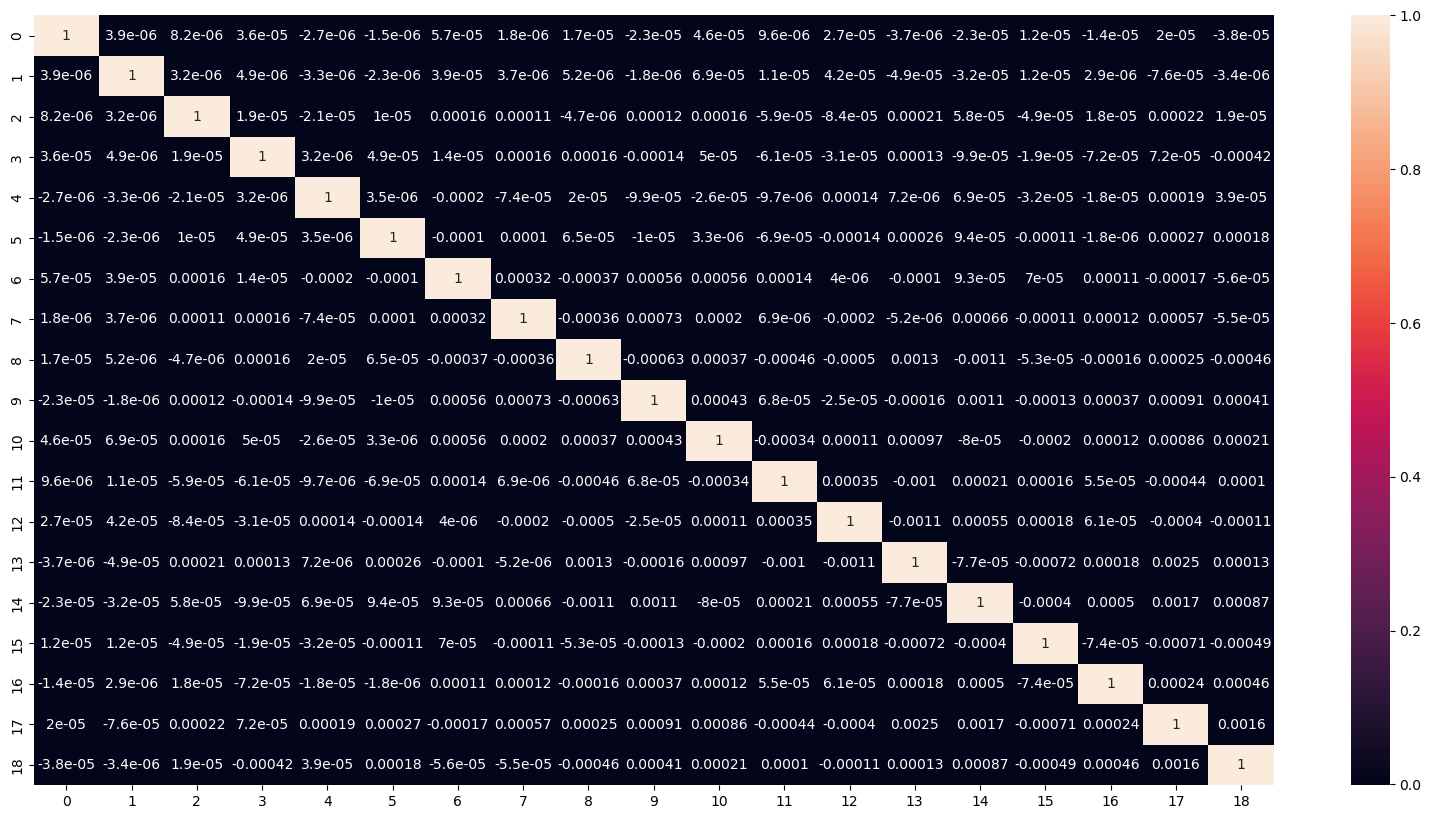

In [357]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat[0:19,0:19],annot = True)


<Axes: >

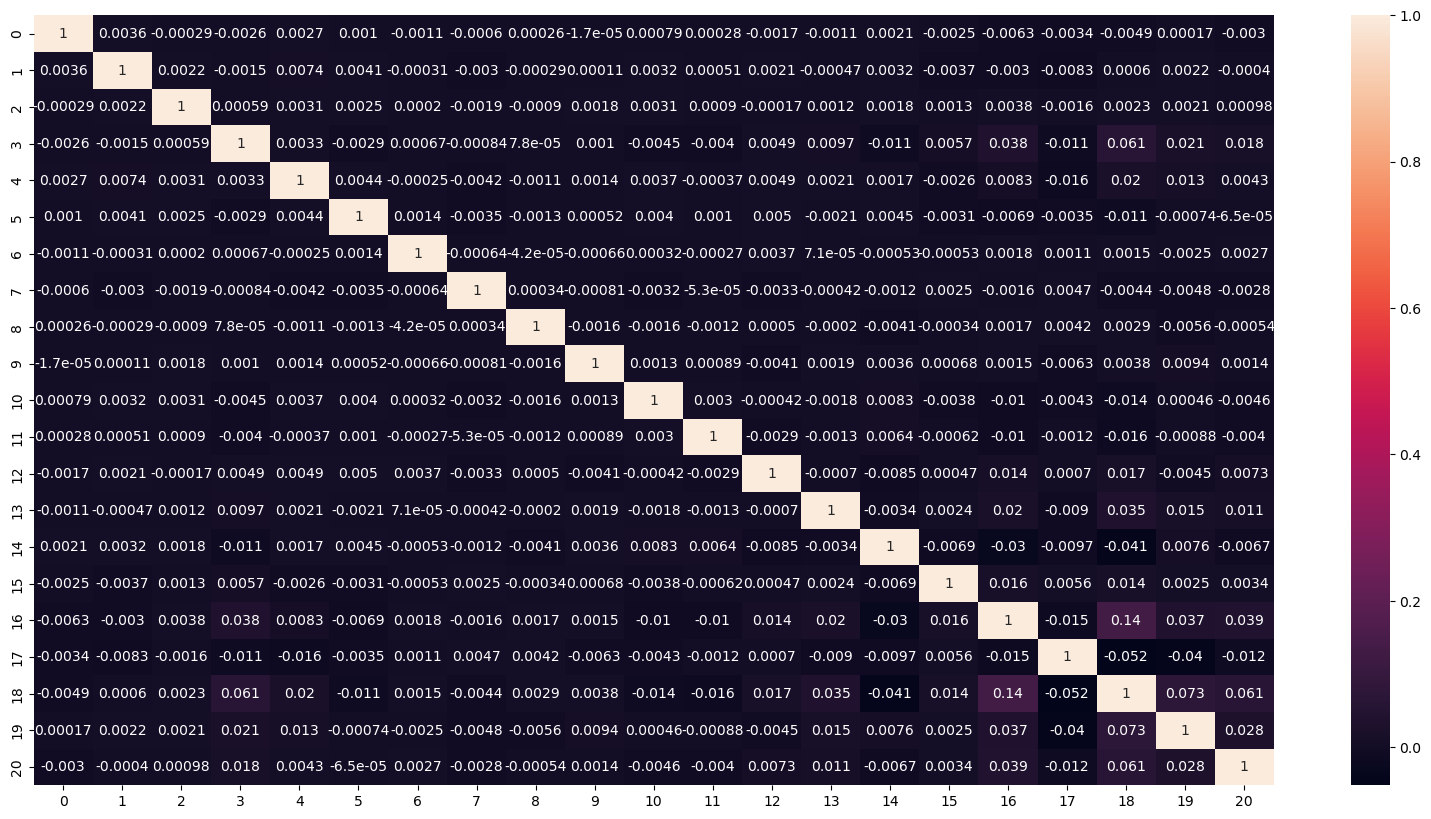

In [358]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat[19:40,19:40],annot = True)

In [359]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.13576066799010858 , min corr:  -0.05191232412202704


In [360]:
#Applying selected components to the test data - 16 components
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(8994, 40)

### Step 10: MODEL 4 using LogisticRegressionCV

In [361]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

log_reg_cv = LogisticRegressionCV(class_weight='balanced',cv=20)
model_pca = log_reg_cv.fit(X_train_pca,y_train)

In [362]:
#Making prediction on the train data
y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.89'

In [363]:
#Making prediction on the test data
y_pred = model_pca.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.89'

In [364]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix

In [365]:
y_pred=pd.Series(y_pred)
y_train_pred=pd.Series(y_train_pred)

In [366]:
y_pred_bool= y_pred.apply(lambda x: 1 if x>=0.5 else 0)
y_train_pred_bool= y_train_pred.apply(lambda x: 1 if x>=0.5 else 0)

In [367]:
confusion_matrix(y_test,y_pred_bool)

array([[6858, 1359],
       [ 143,  634]], dtype=int64)

In [368]:
confusion_matrix(y_train,y_train_pred_bool)

array([[15930,  3243],
       [  322,  1490]], dtype=int64)

In [369]:
precision_score(y_test,y_pred_bool)

0.3181133968891119

In [370]:
recall_score(y_test,y_pred_bool)

0.8159588159588159

In [371]:
accuracy_score(y_test,y_pred_bool)

0.8329997776295308

#### Model 4 Metric Summary

In [372]:
get_model_metrics(y_test,y_pred_bool)

Accuracy    : 0.83
Sensitivity : 0.82
Specificity : 0.83
Precision   : 0.32
Recall      : 0.82
F1_score    : 0.86


#### Model 5 Final Model

In [373]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(X_train_pca,y_train)

In [374]:
#Making prediction on the train data
y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.89'

In [375]:
#Making prediction on the test data
y_pred = model_pca.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, y_pred))

'0.89'

In [376]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix

In [377]:
y_pred=pd.Series(y_pred)
y_train_pred=pd.Series(y_train_pred)

In [378]:
y_pred_bool= y_pred.apply(lambda x: 1 if x>=0.5 else 0)
y_train_pred_bool= y_train_pred.apply(lambda x: 1 if x>=0.5 else 0)

In [379]:
confusion_matrix(y_test,y_pred_bool)

array([[6856, 1361],
       [ 138,  639]], dtype=int64)

In [380]:
confusion_matrix(y_train,y_train_pred_bool)

array([[15880,  3293],
       [  314,  1498]], dtype=int64)

In [381]:
import  sklearn.metrics

In [382]:
precision_score(y_test,y_pred_bool)

0.3195

In [383]:
recall_score(y_test,y_pred_bool)

0.8223938223938224

In [384]:
accuracy_score(y_test,y_pred_bool)

0.8333333333333334

In [385]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [386]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_train_pred, drop_intermediate = False )

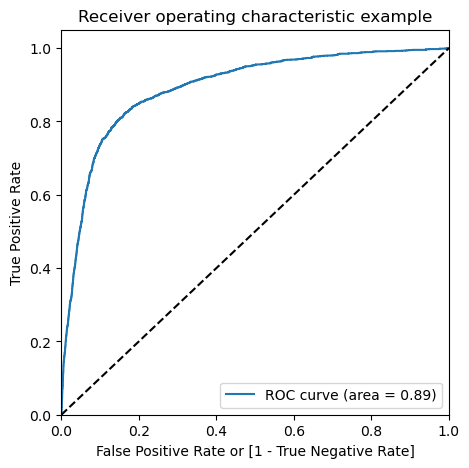

In [387]:
draw_roc(y_train, y_train_pred)

In [388]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_train,y_train_pred_bool)

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

def threshold_optimization(y,num):
    #pass the prediction_probability series and threshold probabilty cutoff
    y_bool= y.apply(lambda x: 1 if x>=num else 0)
    return y_bool

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train,threshold_optimization(y_train_pred,i))
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086347  1.000000  0.000000
0.1   0.1  0.371932  0.979029  0.314557
0.2   0.2  0.543293  0.952539  0.504616
0.3   0.3  0.666095  0.915011  0.642570
0.4   0.4  0.761592  0.870861  0.751265
0.5   0.5  0.828115  0.826711  0.828248
0.6   0.6  0.871289  0.763797  0.881448
0.7   0.7  0.898975  0.679912  0.919679
0.8   0.8  0.913605  0.501656  0.952537
0.9   0.9  0.919371  0.286976  0.979137


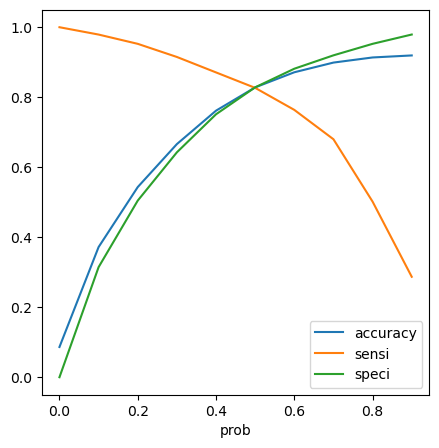

In [389]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Model Threshold optimization

#### Threshold Model Summary with cutoff as 0.3

In [390]:
y_pred_bool= y_pred.apply(lambda x: 1 if x>=0.3 else 0)
y_train_pred_bool= y_train_pred.apply(lambda x: 1 if x>=0.3 else 0)

In [391]:
cm_test=confusion_matrix(y_test,y_pred_bool)

In [392]:

cm_train=confusion_matrix(y_train,y_train_pred_bool)

In [393]:
cm_train

array([[12320,  6853],
       [  154,  1658]], dtype=int64)

In [394]:
cm_test

array([[5313, 2904],
       [  64,  713]], dtype=int64)

In [395]:
get_model_metrics(y_test,y_pred_bool)

Accuracy    : 0.67
Sensitivity : 0.92
Specificity : 0.65
Precision   : 0.2
Recall      : 0.92
F1_score    : 0.74


#### Threshold Model Summary with cutoff as 0.4

In [396]:
y_pred_bool= y_pred.apply(lambda x: 1 if x>=0.4 else 0)
y_train_pred_bool= y_train_pred.apply(lambda x: 1 if x>=0.4 else 0)

In [397]:
get_model_metrics(y_test,y_pred_bool)

Accuracy    : 0.77
Sensitivity : 0.87
Specificity : 0.76
Precision   : 0.25
Recall      : 0.87
F1_score    : 0.81


#### Threshold Model Summary with cutoff as 0.5

In [398]:
y_pred_bool= y_pred.apply(lambda x: 1 if x>=0.5 else 0)
y_train_pred_bool= y_train_pred.apply(lambda x: 1 if x>=0.5 else 0)

In [399]:
get_model_metrics(y_test,y_pred_bool)

Accuracy    : 0.83
Sensitivity : 0.82
Specificity : 0.83
Precision   : 0.32
Recall      : 0.82
F1_score    : 0.86


In [400]:
cross_validated_train_metrics=get_cross_validated_model_metrics(X_train_pca,y_train,cv=5)

In [401]:
cross_validated_train_metrics

accuracy  precision    recall  f1_weighted   roc_auc
0  0.832976   0.318280  0.815427     0.862929  0.887935
1  0.822731   0.306599  0.831956     0.855804  0.891025
2  0.829402   0.313291  0.820442     0.860503  0.886253
3  0.821777   0.304260  0.828729     0.855136  0.887728
4  0.834882   0.318332  0.801105     0.864122  0.879166

In [402]:
cross_validated_train_metrics.mean()

accuracy       0.828354
precision      0.312152
recall         0.819532
f1_weighted    0.859699
roc_auc        0.886421
dtype: float64

In [403]:
cross_validated_test_metrics=get_cross_validated_model_metrics(X_test_pca,y_test,cv=5)

In [404]:
cross_validated_test_metrics

accuracy  precision    recall  f1_weighted   roc_auc
0  0.829906   0.314496  0.825806     0.860981  0.900314
1  0.813785   0.296380  0.845161     0.849641  0.906263
2  0.837688   0.311111  0.717949     0.864401  0.851815
3  0.807115   0.297240  0.897436     0.845342  0.905360
4  0.828142   0.316667  0.858065     0.860207  0.901789

In [405]:
cross_validated_test_metrics.mean()

accuracy       0.823327
precision      0.307179
recall         0.828883
f1_weighted    0.856114
roc_auc        0.893108
dtype: float64

## Hence, we have a very stable model which will predict the churn

Threshold optimization is based on the business use case.

The optimal threshold for accuracy, sensitivity, specificity' is 0.5.
Our primary goal is to improve Sensitivity. 
Type 1 error would be not predicting the churn customers. We can afford False positive values.But we can not neglect missing False Negative values. 

The optimal cutoff should be 0.5

But if business does not want to loose more False Negatives then we can keep 0.3 or 0.4 to improve the recall score.